In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("E:\\DS Assignment\\CocaCola_Sales_Rawdata.csv")
df
print('Shape of the data',df.shape)
df.head(10)

Shape of the data (42, 2)


Quarter        Sales
0   Q1_86  1734.827000
1   Q2_86  2244.960999
2   Q3_86  2533.804993
3   Q4_86  2154.962997
4   Q1_87  1547.818996
5   Q2_87  2104.411995
6   Q3_87  2014.362999
7   Q4_87  1991.746998
8   Q1_88  1869.049999
9   Q2_88  2313.631996

In [4]:
df.isnull().any()


Quarter    False
Sales      False
dtype: bool

In [5]:
df.isnull().sum()


Quarter    0
Sales      0
dtype: int64

In [6]:
df.shape


(42, 2)

In [7]:
df.dtypes


Quarter     object
Sales      float64
dtype: object

In [8]:
df.nunique()


Quarter    42
Sales      42
dtype: int64

In [9]:
df[df.duplicated()].shape


(0, 2)

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 804.0+ bytes


In [11]:
df[df.duplicated()]


Empty DataFrame
Columns: [Quarter, Sales]
Index: []

In [12]:
df.describe()


Sales
count    42.000000
mean   2994.353308
std     977.930896
min    1547.818996
25%    2159.714247
50%    2782.376999
75%    3609.250000
max    5253.000000

In [13]:
df['Quarter_Year'] = df['Quarter'].str.split('_').apply(lambda x: ' 19'.join(x[:]))
df.head(10)


Quarter        Sales Quarter_Year
0   Q1_86  1734.827000      Q1 1986
1   Q2_86  2244.960999      Q2 1986
2   Q3_86  2533.804993      Q3 1986
3   Q4_86  2154.962997      Q4 1986
4   Q1_87  1547.818996      Q1 1987
5   Q2_87  2104.411995      Q2 1987
6   Q3_87  2014.362999      Q3 1987
7   Q4_87  1991.746998      Q4 1987
8   Q1_88  1869.049999      Q1 1988
9   Q2_88  2313.631996      Q2 1988

In [14]:
df['Date'] = (pd.to_datetime( df['Quarter_Year'].str.split(' ').apply(lambda x: ''.join(x[::-1])),dayfirst=True))
df.head(10)


Quarter        Sales Quarter_Year       Date
0   Q1_86  1734.827000      Q1 1986 1986-01-01
1   Q2_86  2244.960999      Q2 1986 1986-04-01
2   Q3_86  2533.804993      Q3 1986 1986-07-01
3   Q4_86  2154.962997      Q4 1986 1986-10-01
4   Q1_87  1547.818996      Q1 1987 1987-01-01
5   Q2_87  2104.411995      Q2 1987 1987-04-01
6   Q3_87  2014.362999      Q3 1987 1987-07-01
7   Q4_87  1991.746998      Q4 1987 1987-10-01
8   Q1_88  1869.049999      Q1 1988 1988-01-01
9   Q2_88  2313.631996      Q2 1988 1988-04-01

In [15]:
df['Quarters'] = 0

for i in range(42):
    n = df['Quarter'][i]
    df['Quarters'][i] = n[0:2]
    
df.head(10)

Quarter        Sales Quarter_Year       Date Quarters
0   Q1_86  1734.827000      Q1 1986 1986-01-01       Q1
1   Q2_86  2244.960999      Q2 1986 1986-04-01       Q2
2   Q3_86  2533.804993      Q3 1986 1986-07-01       Q3
3   Q4_86  2154.962997      Q4 1986 1986-10-01       Q4
4   Q1_87  1547.818996      Q1 1987 1987-01-01       Q1
5   Q2_87  2104.411995      Q2 1987 1987-04-01       Q2
6   Q3_87  2014.362999      Q3 1987 1987-07-01       Q3
7   Q4_87  1991.746998      Q4 1987 1987-10-01       Q4
8   Q1_88  1869.049999      Q1 1988 1988-01-01       Q1
9   Q2_88  2313.631996      Q2 1988 1988-04-01       Q2

In [16]:
dummy = pd.DataFrame(pd.get_dummies(df['Quarters']))
df1 = pd.concat((df, dummy), axis=1)

df1.head()


Quarter        Sales Quarter_Year       Date Quarters  Q1  Q2  Q3  Q4
0   Q1_86  1734.827000      Q1 1986 1986-01-01       Q1   1   0   0   0
1   Q2_86  2244.960999      Q2 1986 1986-04-01       Q2   0   1   0   0
2   Q3_86  2533.804993      Q3 1986 1986-07-01       Q3   0   0   1   0
3   Q4_86  2154.962997      Q4 1986 1986-10-01       Q4   0   0   0   1
4   Q1_87  1547.818996      Q1 1987 1987-01-01       Q1   1   0   0   0

In [17]:
df1.drop(['Quarter','Quarter_Year'] , axis =1, inplace = True)
df1.head()


Sales       Date Quarters  Q1  Q2  Q3  Q4
0  1734.827000 1986-01-01       Q1   1   0   0   0
1  2244.960999 1986-04-01       Q2   0   1   0   0
2  2533.804993 1986-07-01       Q3   0   0   1   0
3  2154.962997 1986-10-01       Q4   0   0   0   1
4  1547.818996 1987-01-01       Q1   1   0   0   0

In [18]:
df1.set_index('Date',inplace=True)
df1.index.year


Int64Index([1986, 1986, 1986, 1986, 1987, 1987, 1987, 1987, 1988, 1988, 1988,
            1988, 1989, 1989, 1989, 1989, 1990, 1990, 1990, 1990, 1991, 1991,
            1991, 1991, 1992, 1992, 1992, 1992, 1993, 1993, 1993, 1993, 1994,
            1994, 1994, 1994, 1995, 1995, 1995, 1995, 1996, 1996],
           dtype='int64', name='Date')

In [19]:
df1.head()


Sales Quarters  Q1  Q2  Q3  Q4
Date                                            
1986-01-01  1734.827000       Q1   1   0   0   0
1986-04-01  2244.960999       Q2   0   1   0   0
1986-07-01  2533.804993       Q3   0   0   1   0
1986-10-01  2154.962997       Q4   0   0   0   1
1987-01-01  1547.818996       Q1   1   0   0   0

In [20]:
df["Date"] = pd.to_datetime(df.Date,format="%b-%y")
df["month"] = df.Date.dt.strftime("%b") # month extraction
df["year"] = df.Date.dt.strftime("%Y") # year extraction
df.head(10)


Quarter        Sales Quarter_Year       Date Quarters month  year
0   Q1_86  1734.827000      Q1 1986 1986-01-01       Q1   Jan  1986
1   Q2_86  2244.960999      Q2 1986 1986-04-01       Q2   Apr  1986
2   Q3_86  2533.804993      Q3 1986 1986-07-01       Q3   Jul  1986
3   Q4_86  2154.962997      Q4 1986 1986-10-01       Q4   Oct  1986
4   Q1_87  1547.818996      Q1 1987 1987-01-01       Q1   Jan  1987
5   Q2_87  2104.411995      Q2 1987 1987-04-01       Q2   Apr  1987
6   Q3_87  2014.362999      Q3 1987 1987-07-01       Q3   Jul  1987
7   Q4_87  1991.746998      Q4 1987 1987-10-01       Q4   Oct  1987
8   Q1_88  1869.049999      Q1 1988 1988-01-01       Q1   Jan  1988
9   Q2_88  2313.631996      Q2 1988 1988-04-01       Q2   Apr  1988

<Axes: xlabel='month', ylabel='year'>

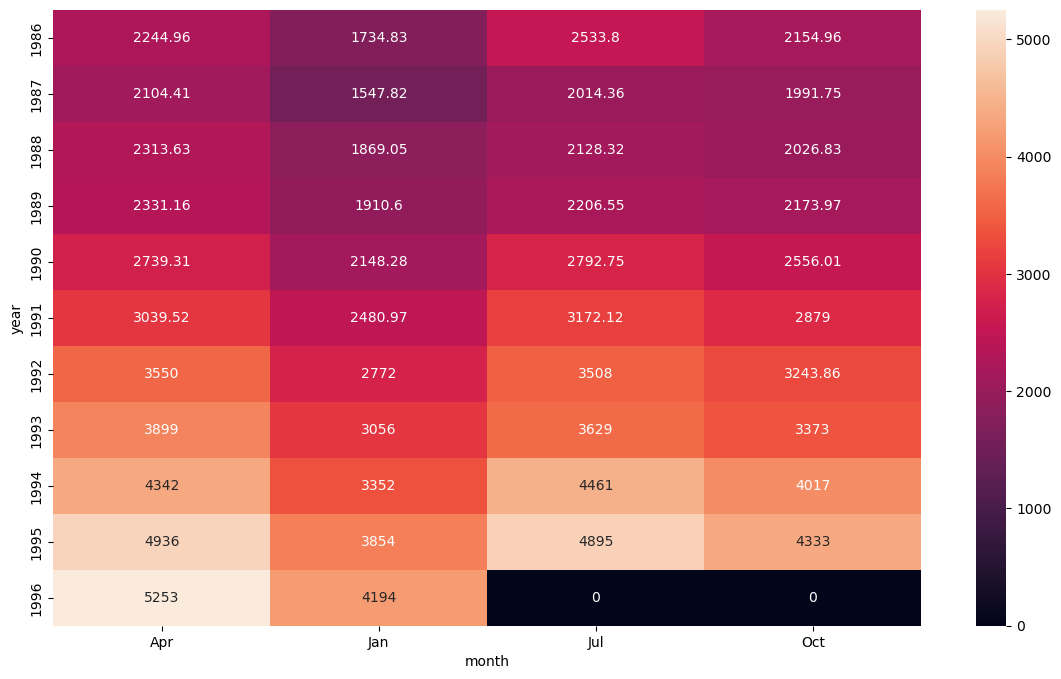

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,8))
heatmap_y_month = pd.pivot_table(data=df,values="Sales",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") 

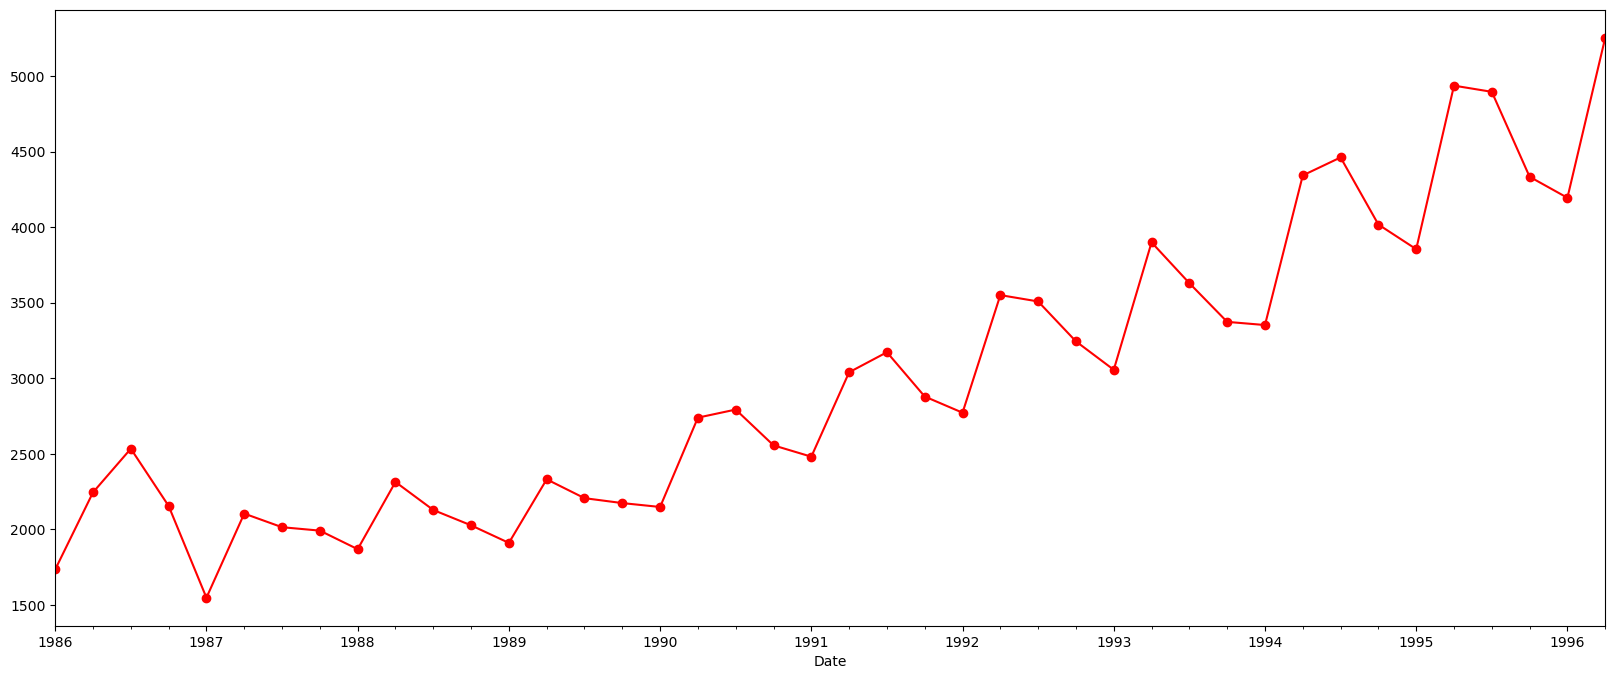

In [22]:
df1['Sales'].plot(figsize=(20, 8),color='red',marker='o')
plt.show()


<Axes: xlabel='Quarters', ylabel='Sales'>

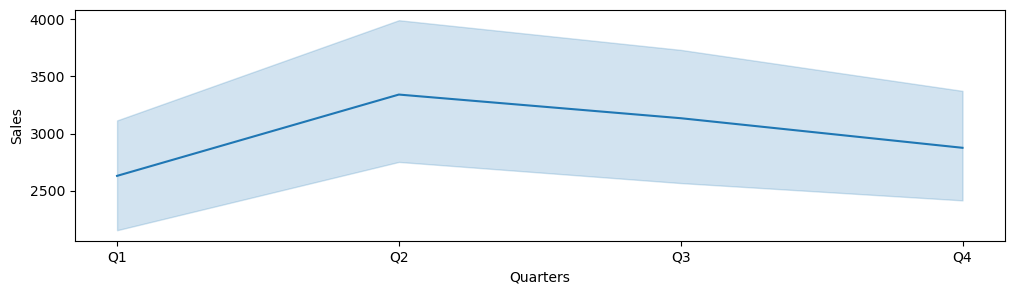

In [23]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Quarters", y="Sales", data=df)


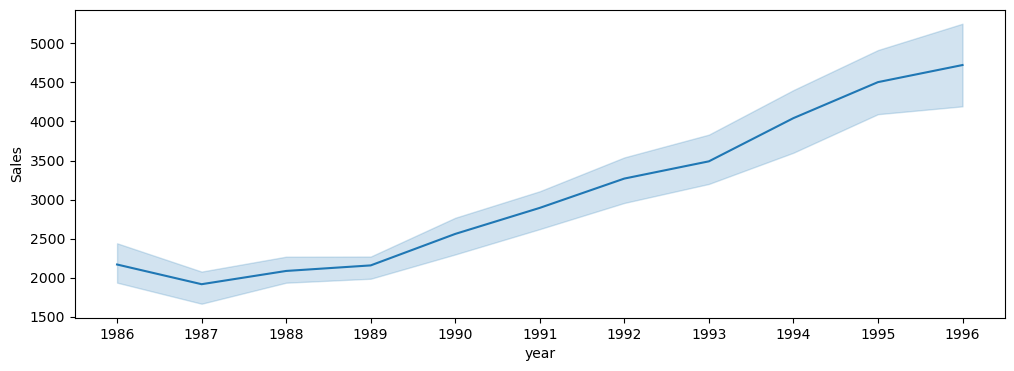

In [24]:
plt.figure(figsize=(12,4))
sns.lineplot(x="year",y="Sales",data=df)
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

<Axes: xlabel='year', ylabel='Sales'>

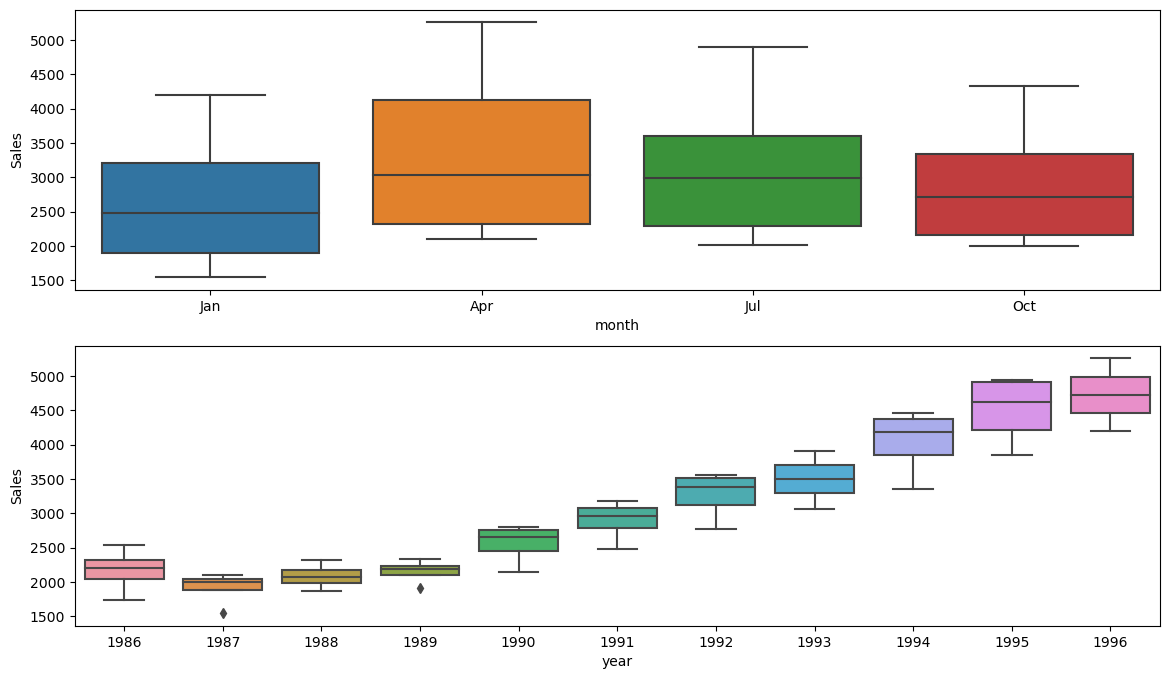

In [25]:
plt.figure(figsize=(14,8))
plt.subplot(211)
sns.boxplot(x="month",y="Sales",data=df)
plt.subplot(212)
sns.boxplot(x="year",y="Sales",data=df)

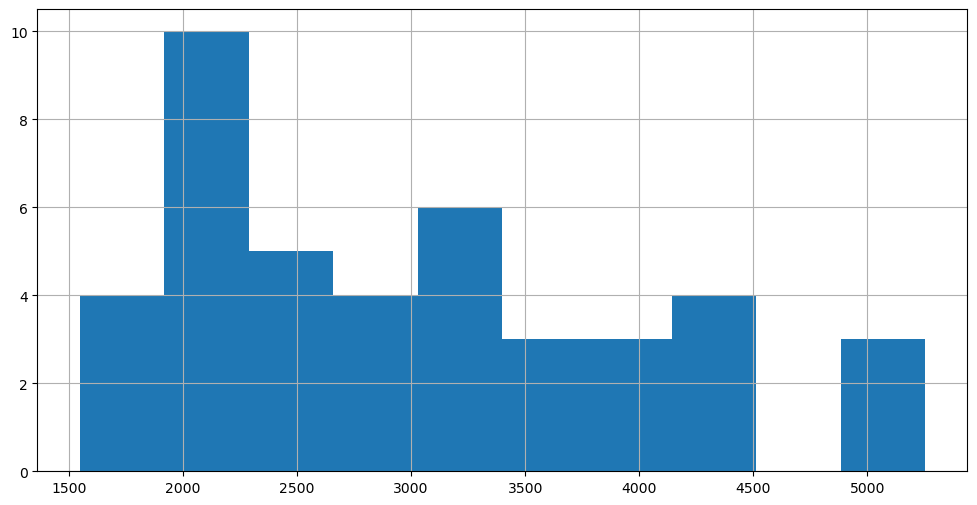

In [26]:
df.Sales.hist(figsize=(12,6))
plt.show()

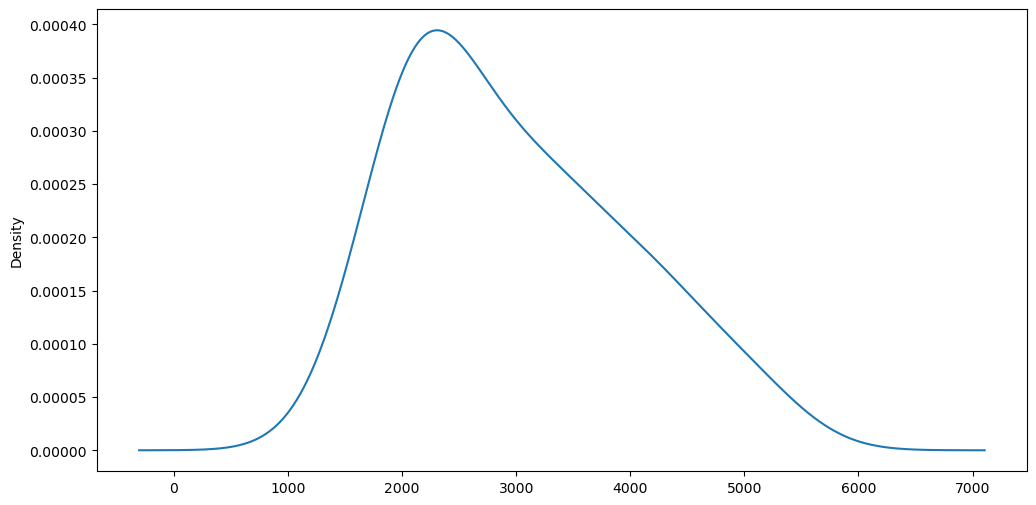

In [27]:
df.Sales.plot(kind='kde', figsize=(12,6))
plt.show()

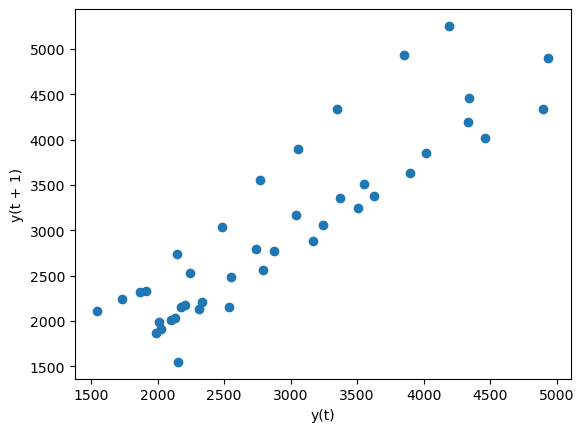

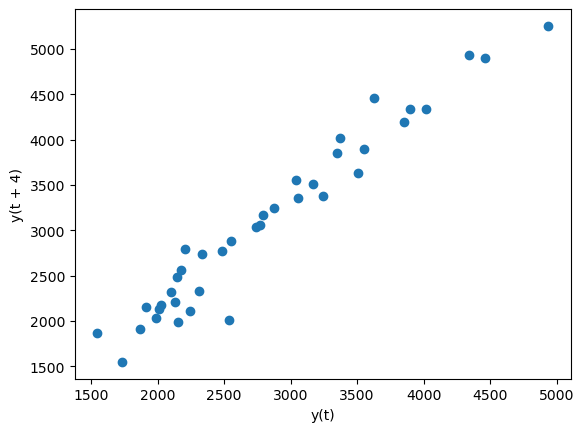

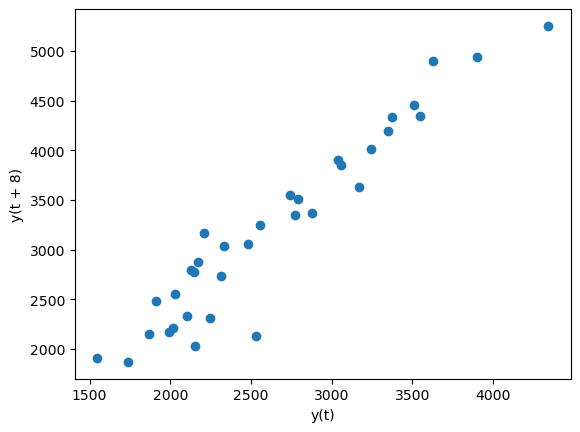

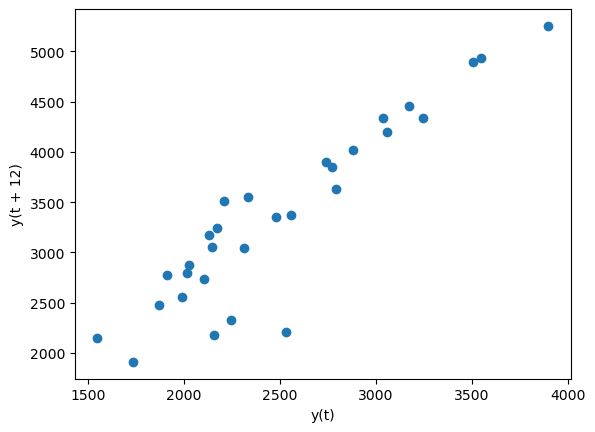

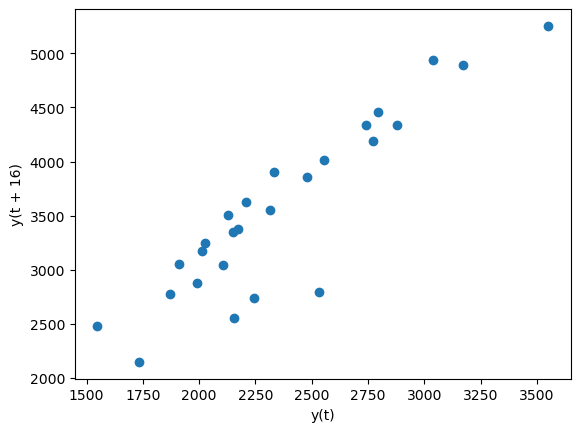

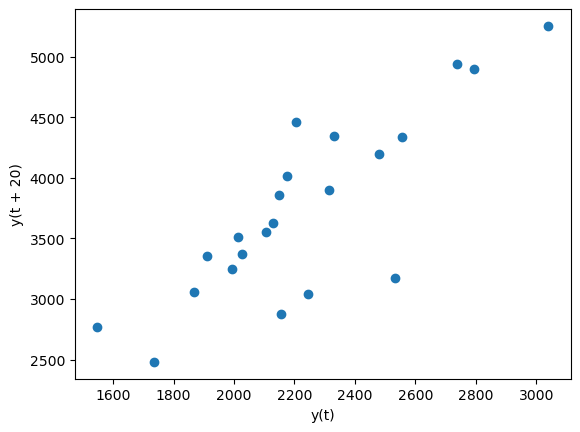

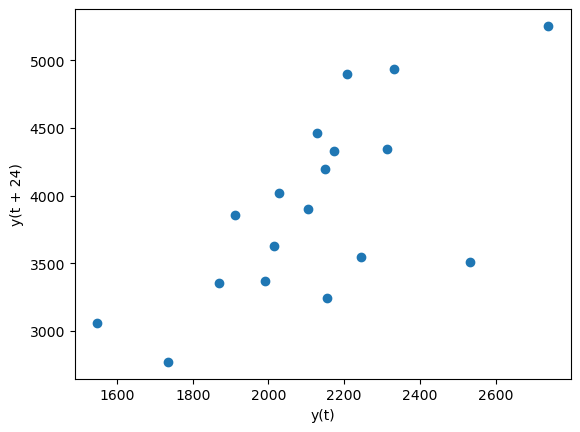

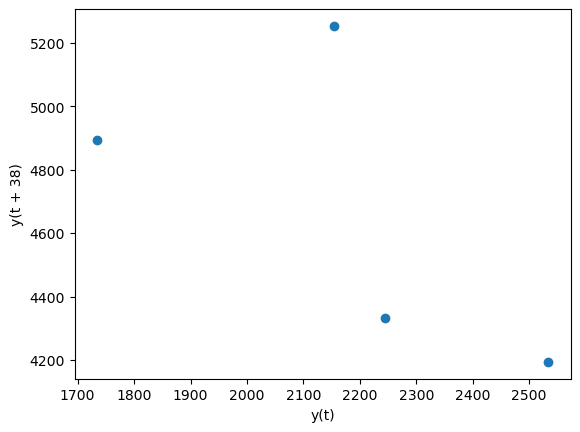

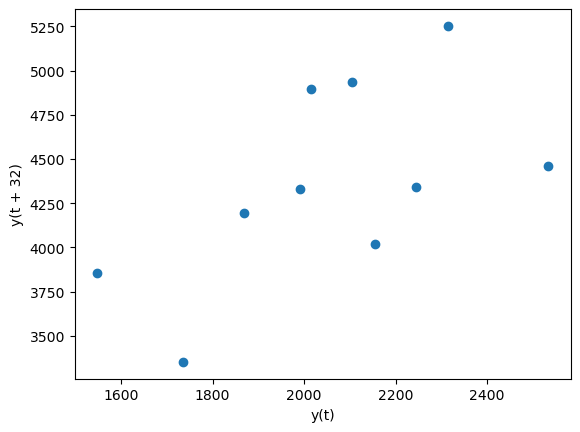

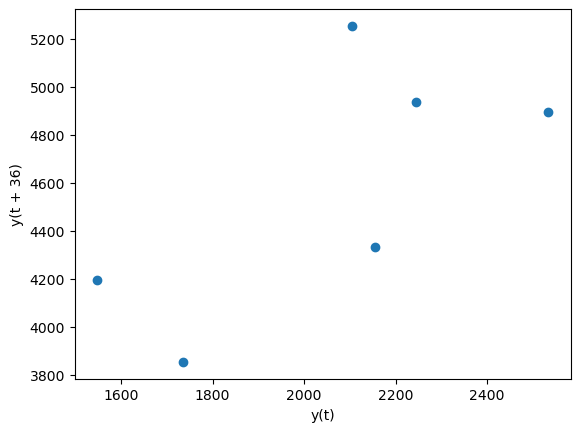

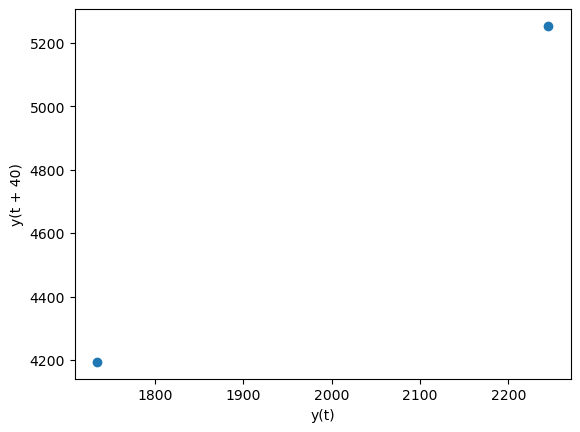

In [28]:
#scatter plot
from pandas.plotting import lag_plot
for i in [1, 4, 8, 12, 16, 20, 24, 38, 32, 36, 40]:
    #plt.figure(figsize=(10,6))
    lag_plot(df.Sales, lag=i)
    plt.show()

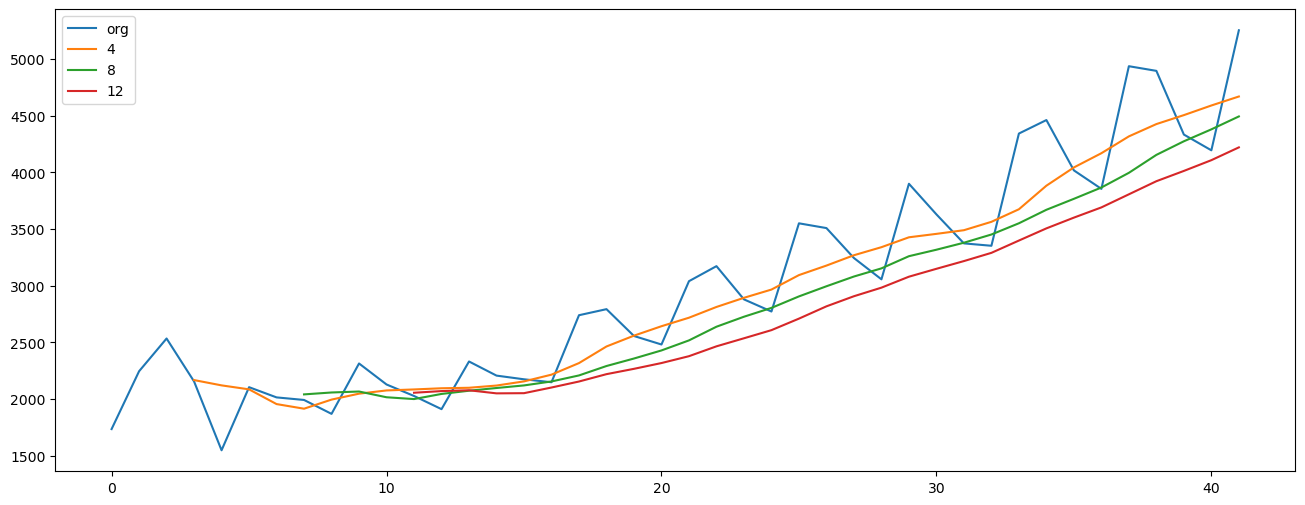

In [29]:
plt.figure(figsize=(16,6))
df.Sales.plot(label="org")
for i in range(4,13,4):
    df["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

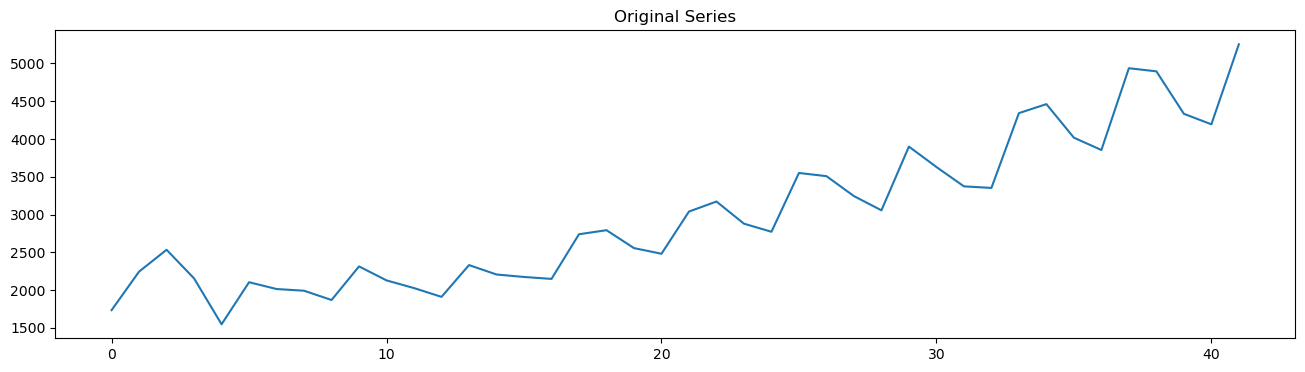

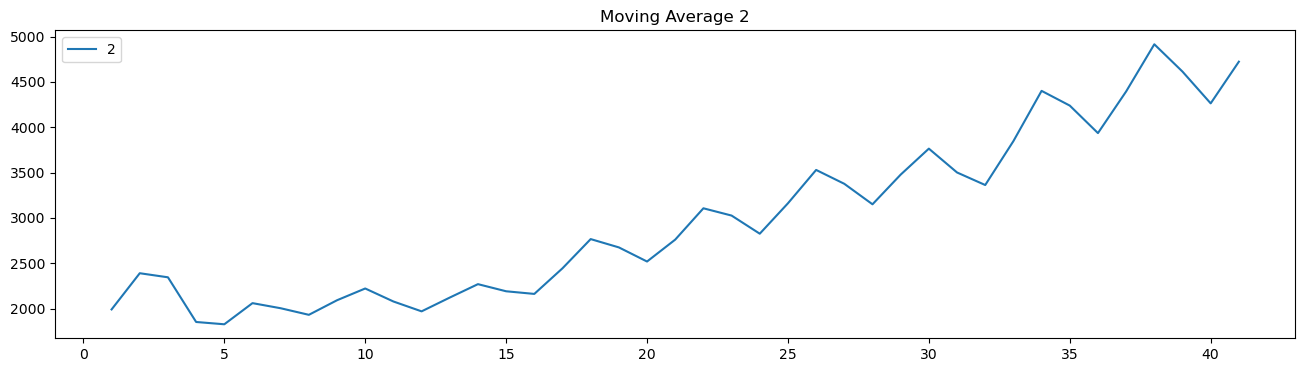

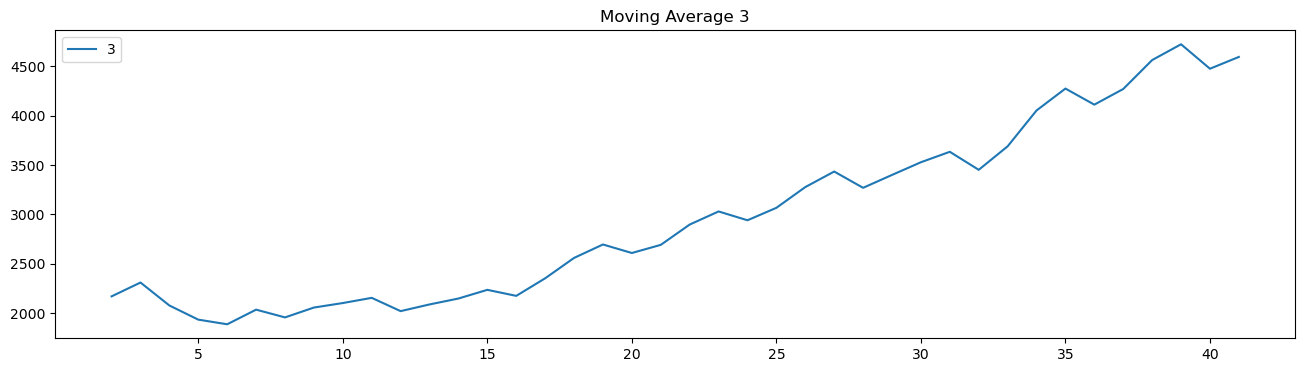

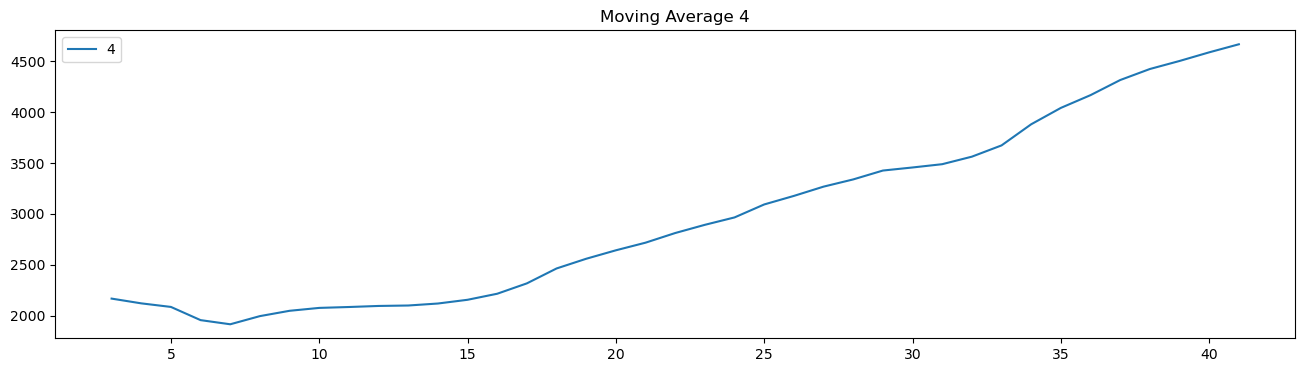

In [30]:
plt.figure(figsize=(16,4))
df.Sales.plot(label="org")
plt.title("Original Series")
for i in range(2,5):
    plt.figure(figsize=(16,4))
    df["Sales"].rolling(i).mean().plot(label=str(i))
    plt.title("Moving Average "+str(i))
    plt.legend(loc='best')
    plt.show()

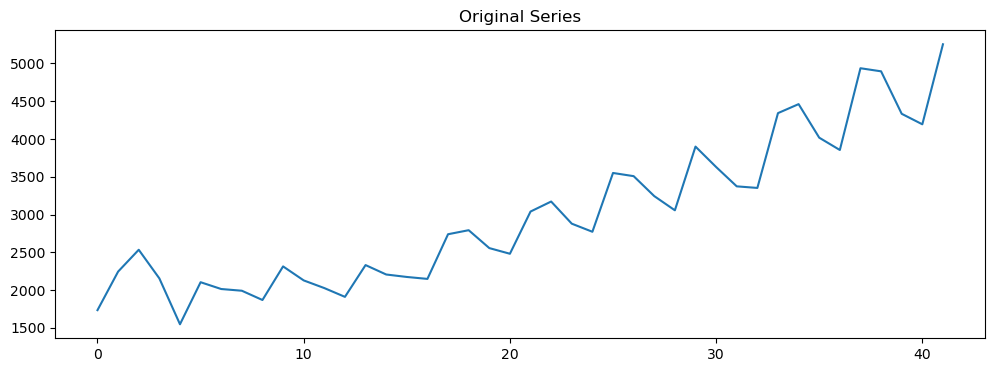

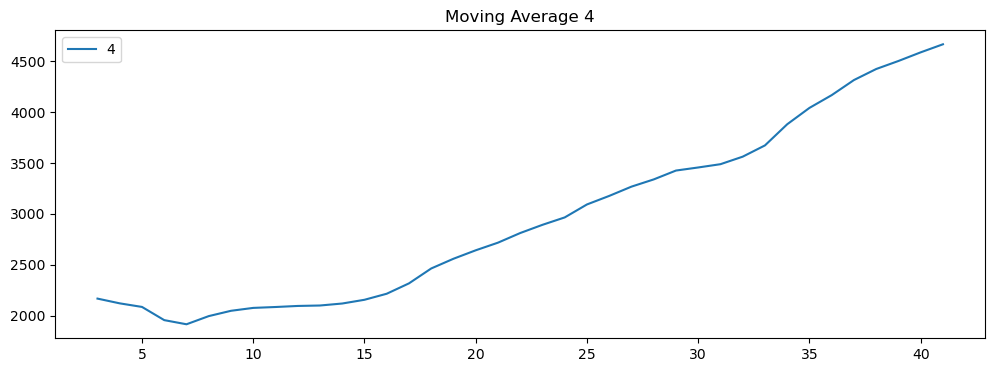

In [31]:
plt.figure(figsize=(12,4))
df.Sales.plot(label="org")
plt.title("Original Series")
plt.figure(figsize=(12,4))
df["Sales"].rolling(4).mean().plot(label=str(4))
plt.title("Moving Average "+str(4))
plt.legend(loc='best')
plt.show()

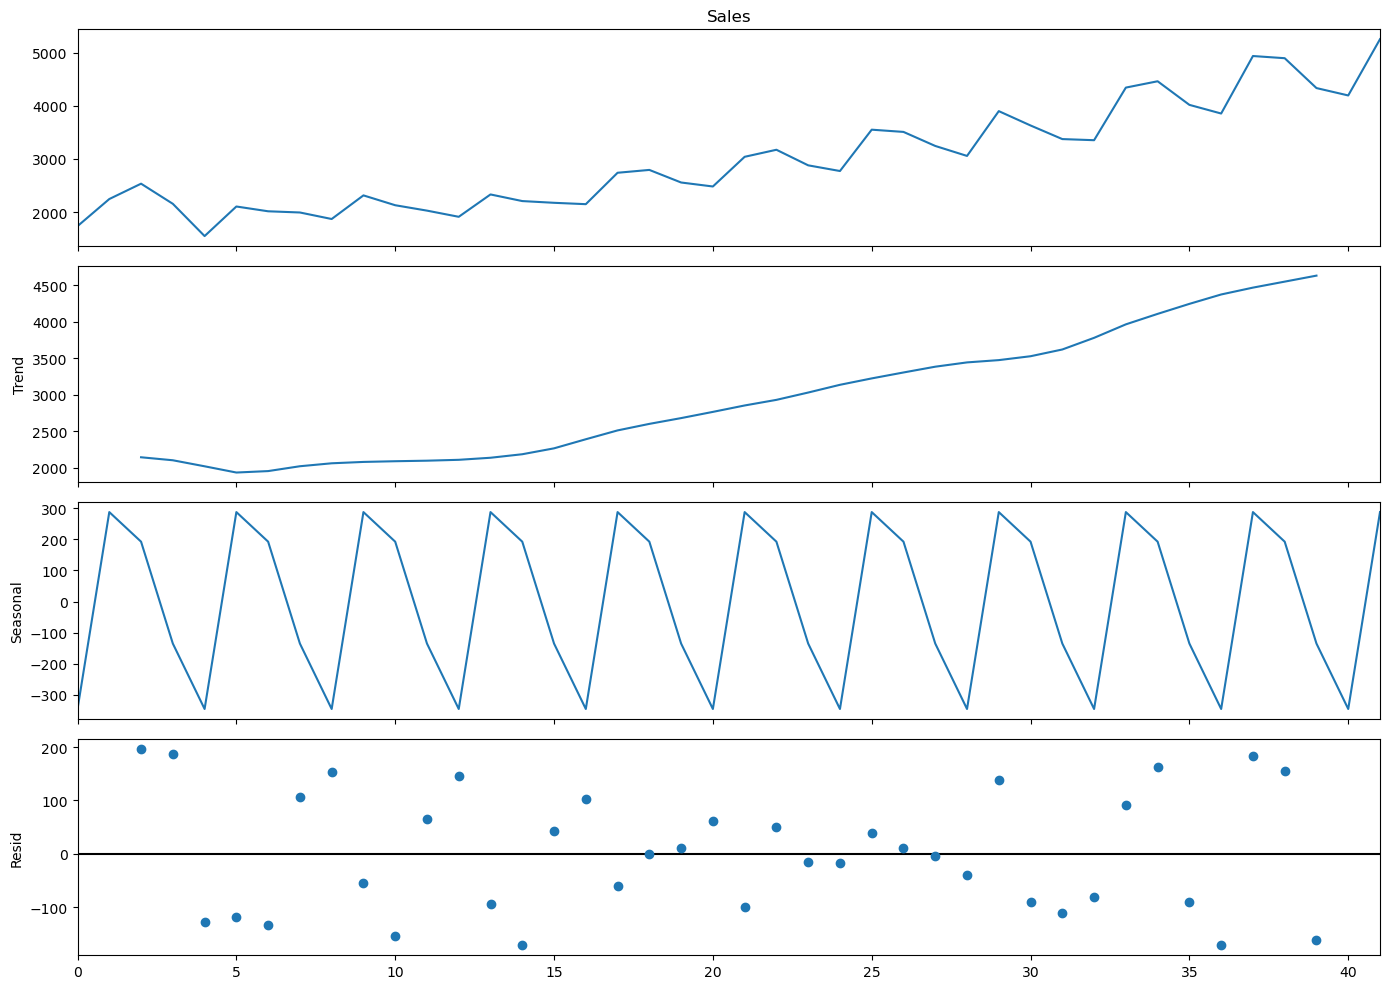

In [32]:

from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(df.Sales,period=4)
with plt.rc_context():
    plt.rc("figure", figsize=(14,10))
    decompose_ts_add.plot()
    plt.show()

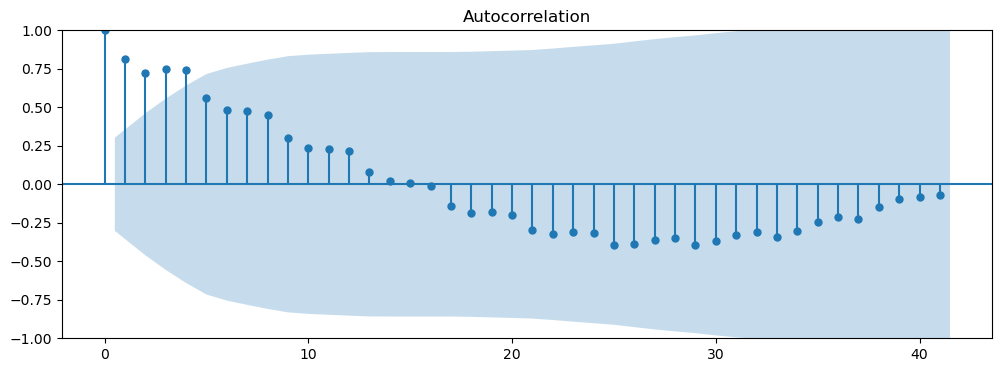

In [33]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(12,4))
    tsa_plots.plot_acf(df.Sales,lags=41)
    plt.show()

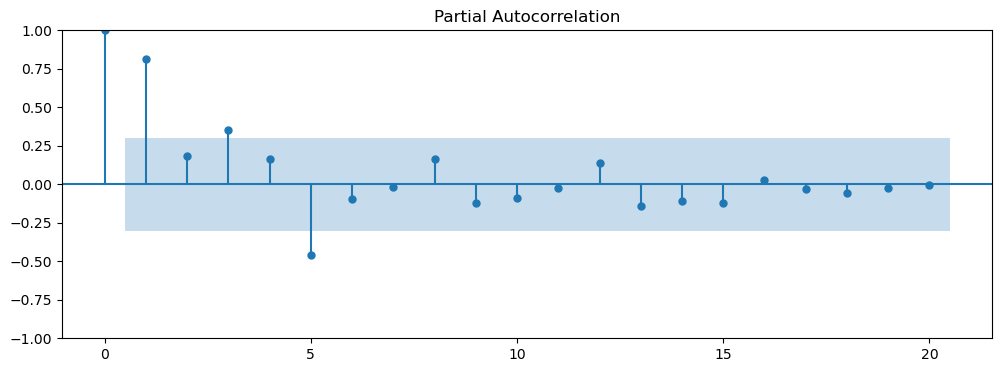

In [34]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(12,4))
    tsa_plots.plot_pacf(df.Sales,lags=20)
    plt.show()

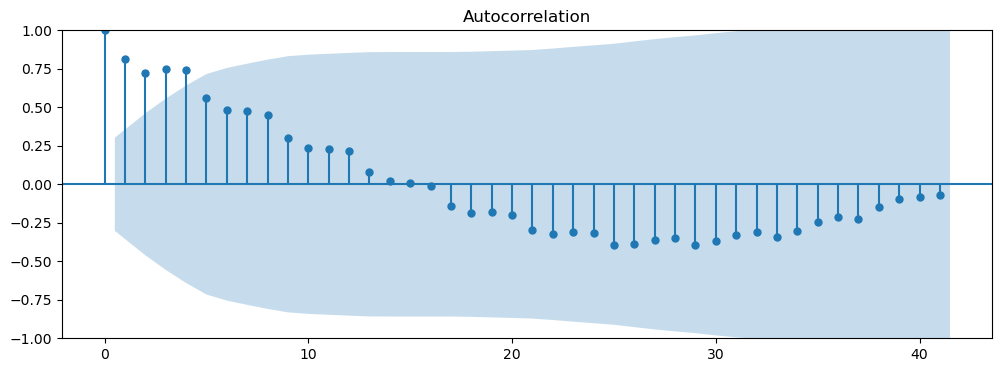

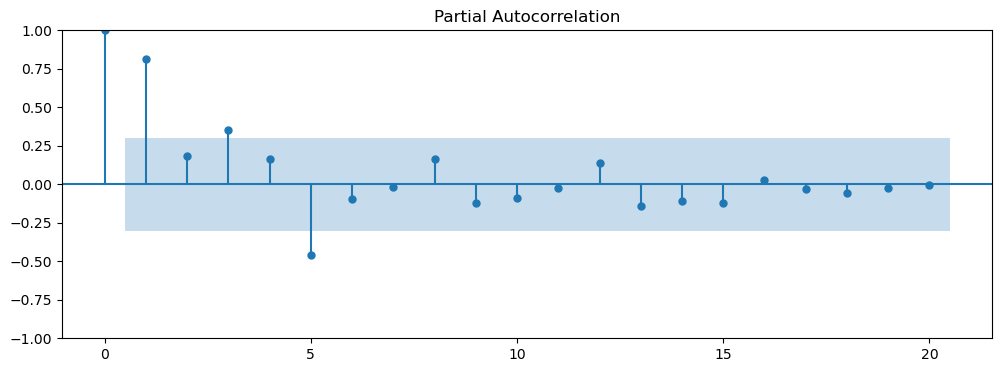

In [35]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(12,4))
    tsa_plots.plot_acf(df.Sales,lags=41)
    tsa_plots.plot_pacf(df.Sales,lags=20)
    plt.show()

In [36]:
upsampled_month = df1.drop(['Quarters','Q1','Q2','Q3','Q4'], axis=1)
upsampled_month = upsampled_month.resample('M').mean()
print(upsampled_month.head(13))

                  Sales
Date                   
1986-01-31  1734.827000
1986-02-28          NaN
1986-03-31          NaN
1986-04-30  2244.960999
1986-05-31          NaN
1986-06-30          NaN
1986-07-31  2533.804993
1986-08-31          NaN
1986-09-30          NaN
1986-10-31  2154.962997
1986-11-30          NaN
1986-12-31          NaN
1987-01-31  1547.818996


                  Sales
Date                   
1986-01-31  1734.827000
1986-02-28  1904.871666
1986-03-31  2074.916333
1986-04-30  2244.960999
1986-05-31  2341.242330
1986-06-30  2437.523662
1986-07-31  2533.804993
1986-08-31  2407.524328
1986-09-30  2281.243662
1986-10-31  2154.962997
1986-11-30  1952.581663
1986-12-31  1750.200330
1987-01-31  1547.818996
1987-02-28  1733.349996
1987-03-31  1918.880995


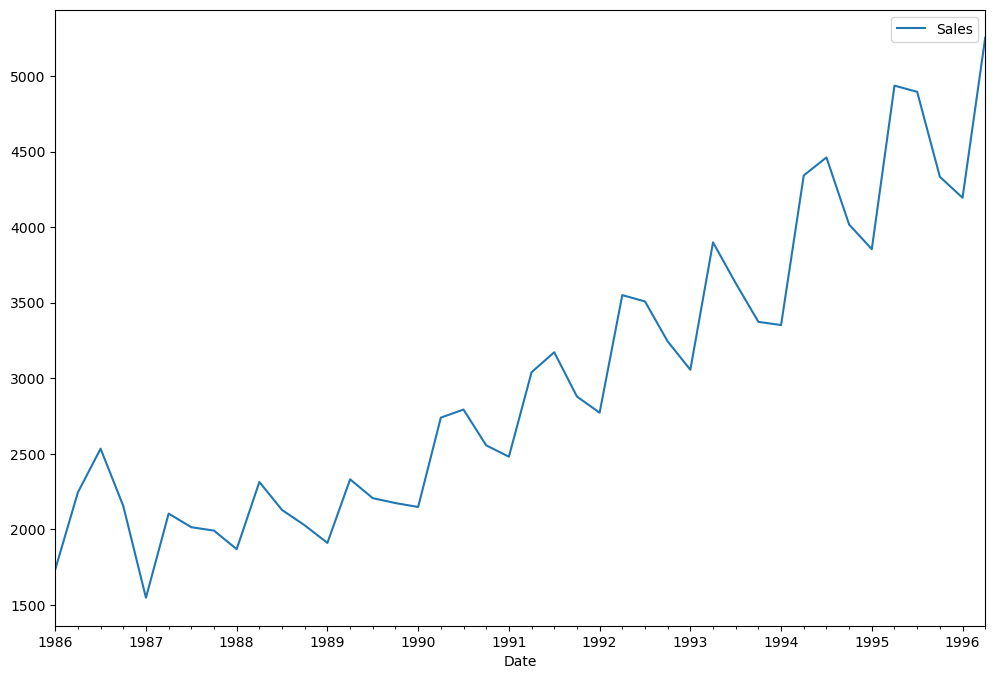

In [37]:
interpolated_month = upsampled_month.interpolate(method='linear') ## interplation was done for nan values which we get after doing upsampling by month
print(interpolated_month.head(15))
interpolated_month.plot(figsize=(12,8))
plt.show()

In [38]:
interpolated_month


Sales
Date                   
1986-01-31  1734.827000
1986-02-28  1904.871666
1986-03-31  2074.916333
1986-04-30  2244.960999
1986-05-31  2341.242330
...                 ...
1995-12-31  4240.333333
1996-01-31  4194.000000
1996-02-29  4547.000000
1996-03-31  4900.000000
1996-04-30  5253.000000

[124 rows x 1 columns]

In [39]:
visual = interpolated_month.copy()
visual.reset_index(inplace=True)
visual['date'] = pd.to_datetime(visual['Date'])
visual['year'] = visual['Date'].dt.year
visual['month'] = visual['Date'].dt.month
visual['week'] = visual['Date'].dt.isocalendar().week
visual['quarter'] = visual['Date'].dt.quarter
visual['day_of_week'] = visual['Date'].dt.day_name()
visual.drop('Date', axis =1 , inplace= True)
visual[:2]

Sales       date  year  month  week  quarter day_of_week
0  1734.827000 1986-01-31  1986      1     5        1      Friday
1  1904.871666 1986-02-28  1986      2     9        1      Friday

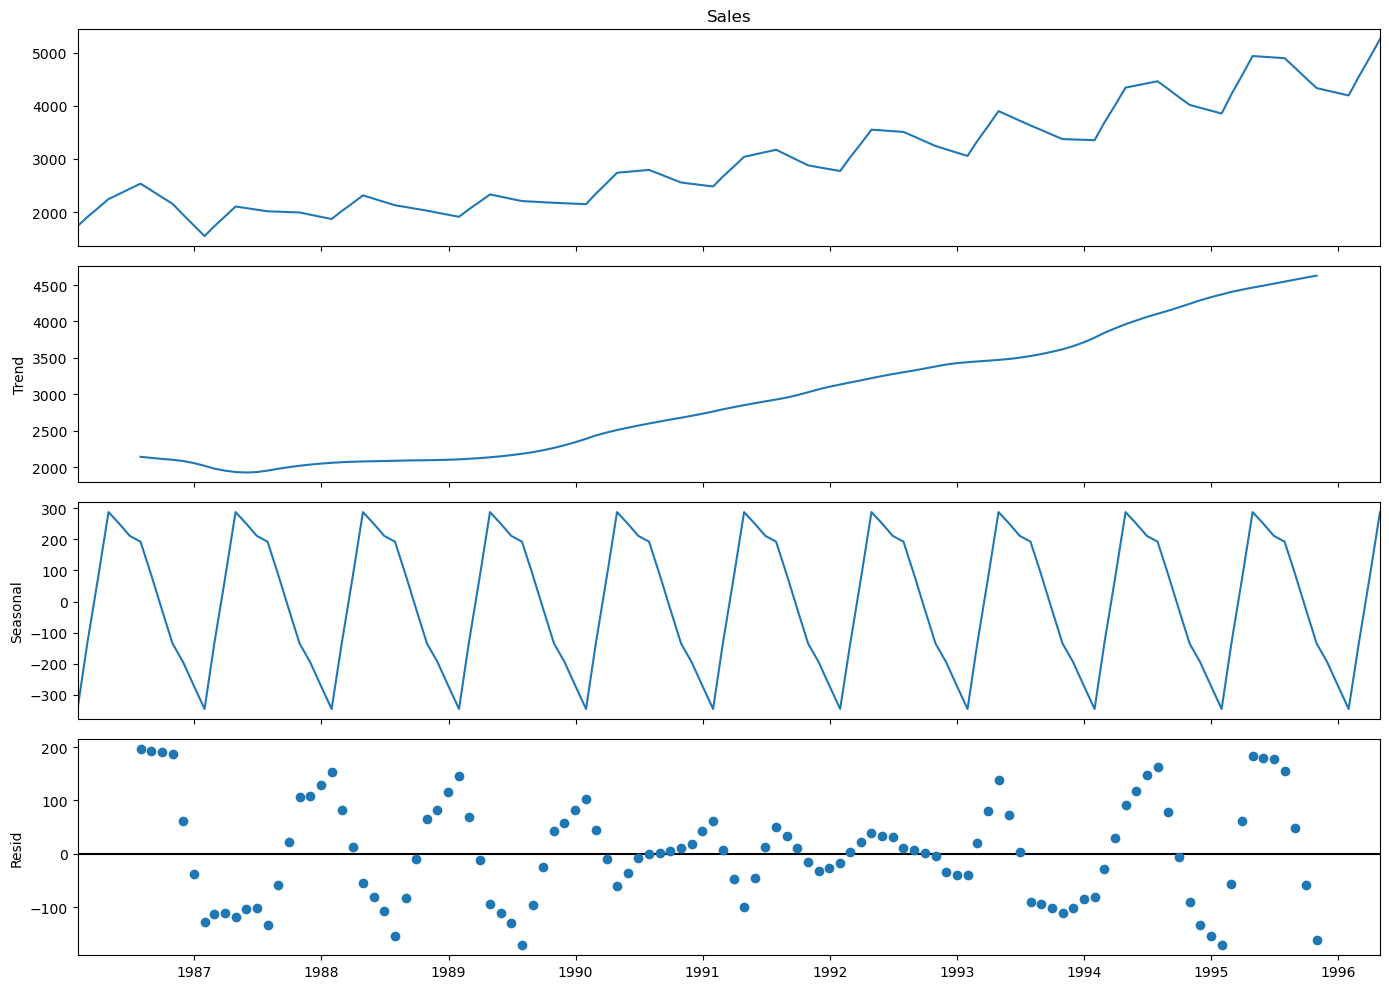

In [40]:
decompose_ts_add = seasonal_decompose(interpolated_month.Sales,period=12, model='additive')
with plt.rc_context():
    plt.rc("figure", figsize=(14,10))
    decompose_ts_add.plot()
    plt.show()

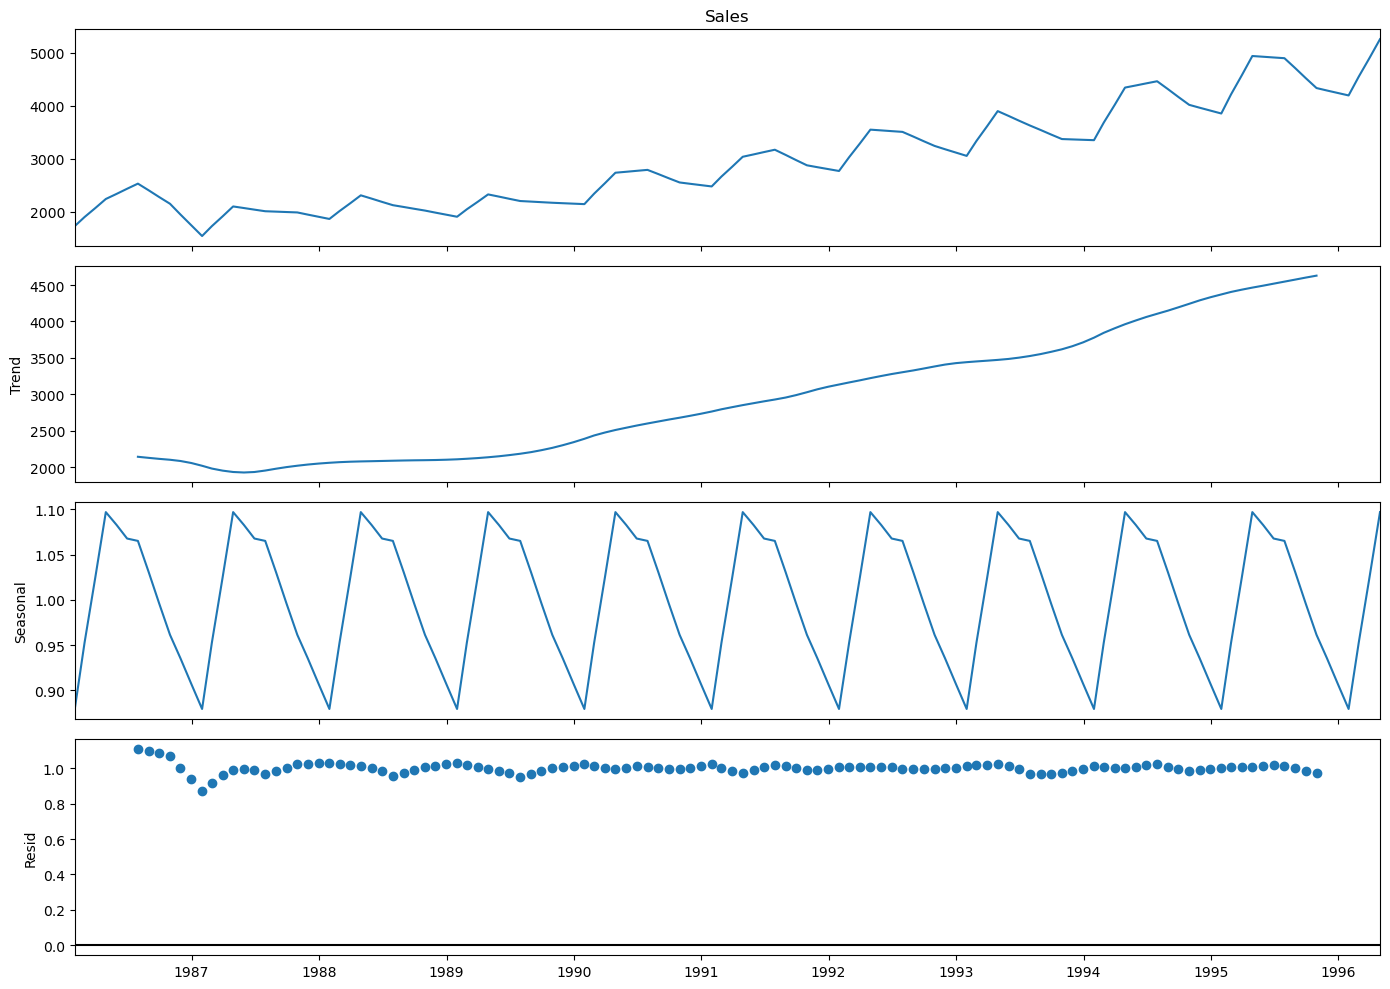

In [41]:
decompose_ts_add = seasonal_decompose(interpolated_month.Sales,period=12, model='multiplicative')
with plt.rc_context():
    plt.rc("figure", figsize=(14,10))
    decompose_ts_add.plot()
    plt.show()

In [42]:
train_data = interpolated_month[:100]
test_data = interpolated_month[100:]

In [43]:
print('Train:',train_data.index.min(),train_data.index.max(),'\n',
'Test:',test_data.index.min(),test_data.index.max())

Train: 1986-01-31 00:00:00 1994-04-30 00:00:00 
 Test: 1994-05-31 00:00:00 1996-04-30 00:00:00


<Axes: xlabel='Date'>

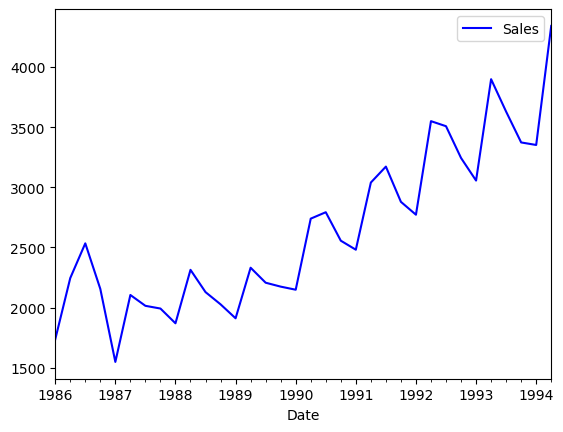

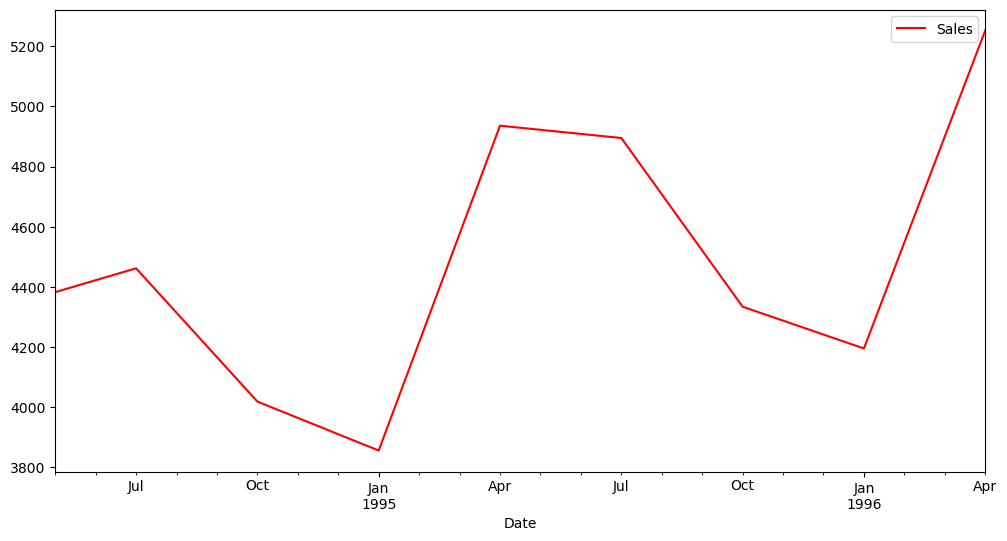

In [44]:
train_data.plot(legend=True,label='TRAIN',color='blue')
test_data.plot(legend=True,label='TEST', figsize=(12,6),color='red')

In [45]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [46]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from math import sqrt
from sklearn.metrics import mean_squared_error
ses_model = SimpleExpSmoothing(train_data['Sales']).fit(optimized=True)
test_pred_ses = ses_model.forecast(24)
train_pred_ses = ses_model.fittedvalues
test_rmse_ses = sqrt(mean_squared_error(test_pred_ses,test_data.Sales))
train_rmse_ses = sqrt(mean_squared_error(train_pred_ses,train_data))
mape_ses = MAPE(test_pred_ses,test_data.Sales)
print('Simple Exponential Method Evaluation',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_ses),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ses),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_ses))

Simple Exponential Method Evaluation 
 Mean Absolute Percent Error = 6.620373886579517 
 Train Root Mean Squared Error = 129.7841472032 
 Test Root Mean Squared Error = 382.4477417207024


In [47]:
ses_model = SimpleExpSmoothing(train_data['Sales']).fit(optimized=True)
test_pred_ses = ses_model.predict(start = test_data.index[0],end = test_data.index[-1])
train_pred_ses = ses_model.fittedvalues
test_rmse_ses = sqrt(mean_squared_error(test_pred_ses,test_data.Sales))
train_rmse_ses = sqrt(mean_squared_error(train_pred_ses,train_data))
mape_ses = MAPE(test_pred_ses,test_data.Sales)
print('Simple Exponential Method Evaluation',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_ses),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ses),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_ses))

Simple Exponential Method Evaluation 
 Mean Absolute Percent Error = 6.620373886579517 
 Train Root Mean Squared Error = 129.7841472032 
 Test Root Mean Squared Error = 382.4477417207024


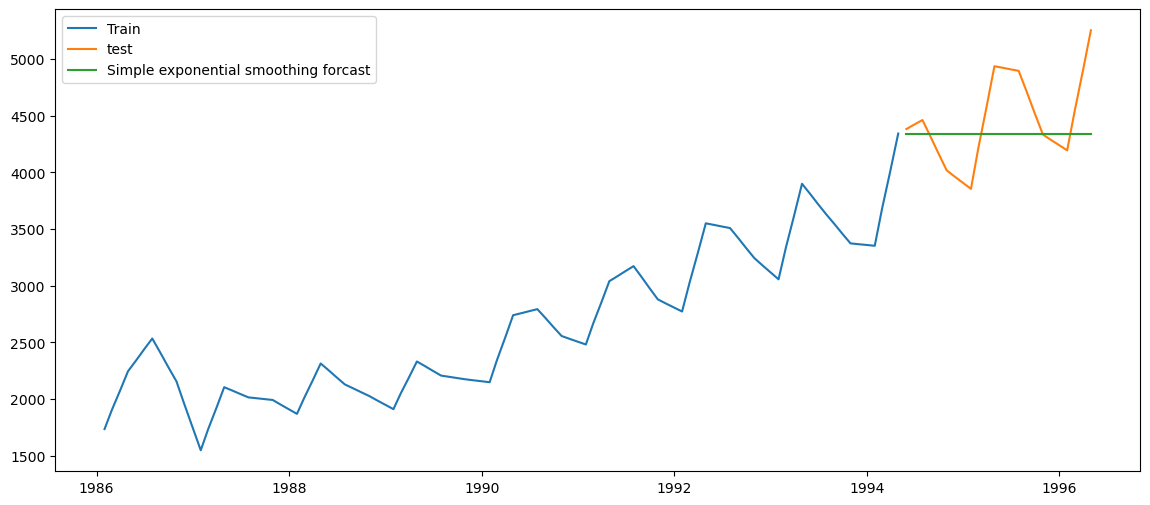

In [48]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.legend(loc='best')
plt.show()


In [49]:
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing

dexp_model  = Holt(train_data).fit(optimized=True)
test_pred_dexp = dexp_model.forecast(24)
train_pred_dexp = dexp_model.fittedvalues
test_rmse_dexp = sqrt(mean_squared_error(test_pred_dexp,test_data.Sales))
train_rmse_dexp = sqrt(mean_squared_error(train_pred_dexp,train_data))
mape_dexp = MAPE(test_pred_dexp,test_data.Sales)
print('Simple Exponential Method Evaluation',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_dexp),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_dexp),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_dexp))

Simple Exponential Method Evaluation 
 Mean Absolute Percent Error = 89.49316047976913 
 Train Root Mean Squared Error = 108.70855312601738 
 Test Root Mean Squared Error = 4549.832584650597


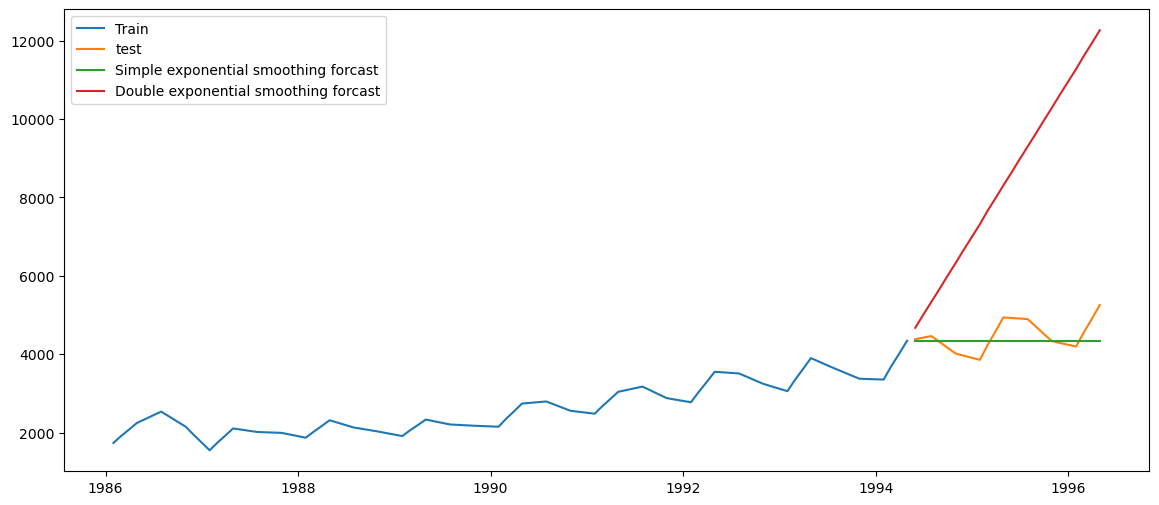

In [50]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

In [51]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
texp_add_model  = ExponentialSmoothing(train_data,seasonal="add",trend="add",seasonal_periods=12).fit(optimized=True)
test_pred_ad_texp = texp_add_model.forecast(24)
train_pred_ad_texp = texp_add_model.fittedvalues
test_rmse_ad_texp = sqrt(mean_squared_error(test_pred_ad_texp,test_data.Sales))
train_rmse_ad_texp = sqrt(mean_squared_error(train_pred_ad_texp,train_data))
mape_ad_texp = MAPE(test_pred_ad_texp,test_data.Sales)
print('Triple Exponential with Additive Trend and Seosonality Method Evaluation',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_ad_texp),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ad_texp),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_ad_texp))

Triple Exponential with Additive Trend and Seosonality Method Evaluation 
 Mean Absolute Percent Error = 35.68610024077049 
 Train Root Mean Squared Error = 44.103021643203306 
 Test Root Mean Squared Error = 1827.513281563731


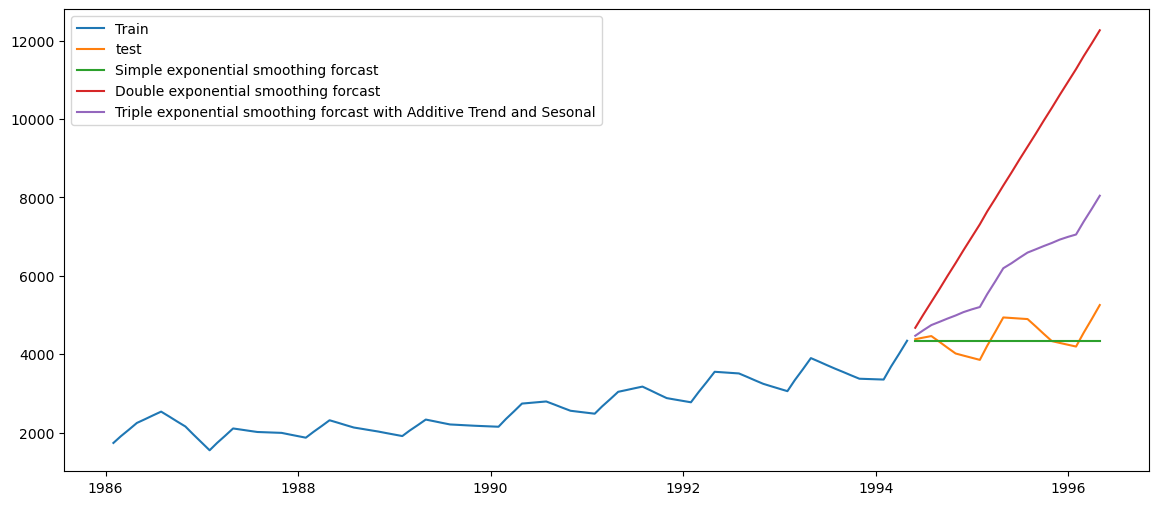

In [52]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.legend(loc='best')
plt.show()

In [53]:
texp_mul_ad_model  = ExponentialSmoothing(train_data,seasonal="mul",trend="add",seasonal_periods=12).fit(optimized=True)
test_pred_mul_ad_texp = texp_mul_ad_model.forecast(24)
train_pred_mul_ad_texp = texp_mul_ad_model.fittedvalues
test_rmse_mul_ad_texp = sqrt(mean_squared_error(test_pred_mul_ad_texp,test_data.Sales))
train_rmse_mul_ad_texp = sqrt(mean_squared_error(train_pred_mul_ad_texp,train_data))
mape_mul_ad_texp = MAPE(test_pred_mul_ad_texp,test_data.Sales)
print('Triple Exponential Method with Multiplicative Seasonality and Additive Trend',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_mul_ad_texp),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_mul_ad_texp),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_mul_ad_texp))

Triple Exponential Method with Multiplicative Seasonality and Additive Trend 
 Mean Absolute Percent Error = 4.101977830635444 
 Train Root Mean Squared Error = 39.94593090277237 
 Test Root Mean Squared Error = 233.05120475132105


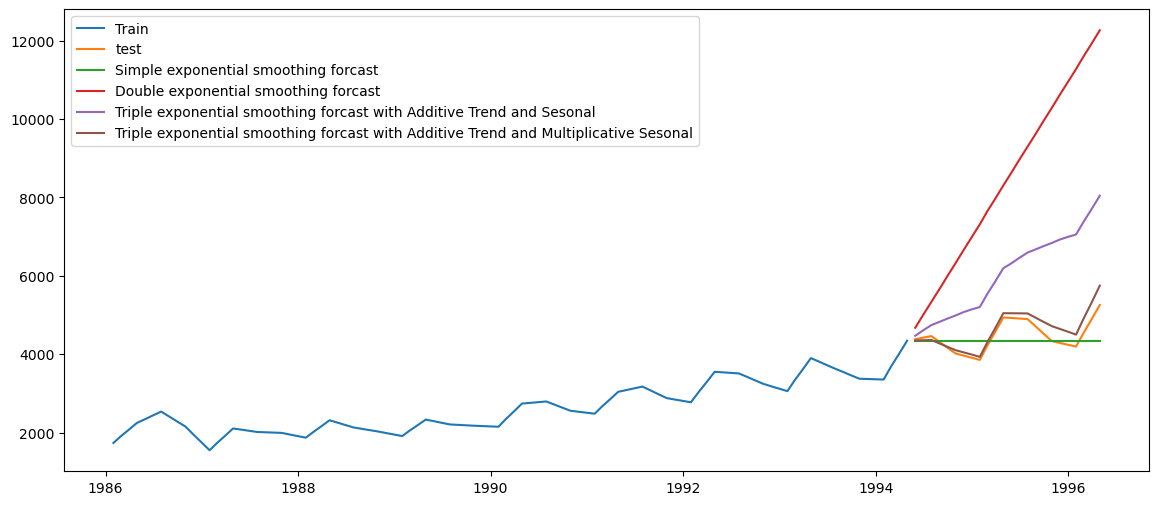

In [54]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.plot(test_pred_mul_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal')
plt.legend(loc='best')
plt.show()

In [55]:
texp_ad_mul_model  = ExponentialSmoothing(train_data,seasonal="add",trend="mul",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.5)
test_pred_ad_mul_texp  = texp_ad_mul_model.forecast(24)
train_pred_ad_mul_texp  = texp_ad_mul_model.fittedvalues
test_rmse_ad_mul_texp  = sqrt(mean_squared_error(test_pred_ad_mul_texp ,test_data.Sales))
train_rmse_ad_mul_texp  = sqrt(mean_squared_error(train_pred_ad_mul_texp ,train_data))
mape_ad_mul_texp  = MAPE(test_pred_ad_mul_texp,test_data.Sales)
print('Triple Exponential Method with Additive Seasonality and Multiplicative Trend',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_ad_mul_texp ),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ad_mul_texp ),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_ad_mul_texp ))

Triple Exponential Method with Additive Seasonality and Multiplicative Trend 
 Mean Absolute Percent Error = 5.416358642609922 
 Train Root Mean Squared Error = 172.29963909067297 
 Test Root Mean Squared Error = 286.15852547503914


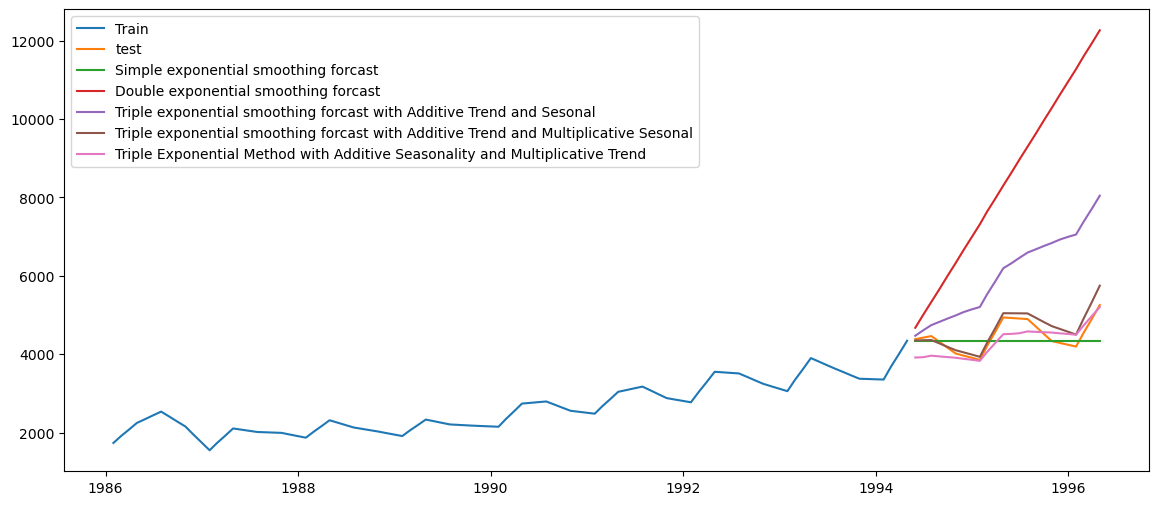

In [56]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.plot(test_pred_mul_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal')
plt.plot(test_pred_ad_mul_texp, label='Triple Exponential Method with Additive Seasonality and Multiplicative Trend')
plt.legend(loc='best')
plt.show()


In [57]:
texp_mul_model  = ExponentialSmoothing(train_data,seasonal="mul",trend="mul",seasonal_periods=12).fit(optimized=True)
test_pred_mul_texp  = texp_mul_model.forecast(24)
train_pred_mul_texp  = texp_mul_model.fittedvalues
test_rmse_mul_texp  = sqrt(mean_squared_error(test_pred_mul_texp ,test_data.Sales))
train_rmse_mul_texp  = sqrt(mean_squared_error(train_pred_mul_texp ,train_data))
mape_mul_texp  = MAPE(test_pred_mul_texp,test_data.Sales)
print('Triple Exponential Method with multiplicative Trend and Seasonality',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_mul_texp ),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_mul_texp ),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_mul_texp ))

Triple Exponential Method with multiplicative Trend and Seasonality 
 Mean Absolute Percent Error = 5.156325040496163 
 Train Root Mean Squared Error = 39.88797250032268 
 Test Root Mean Squared Error = 304.5598442875235


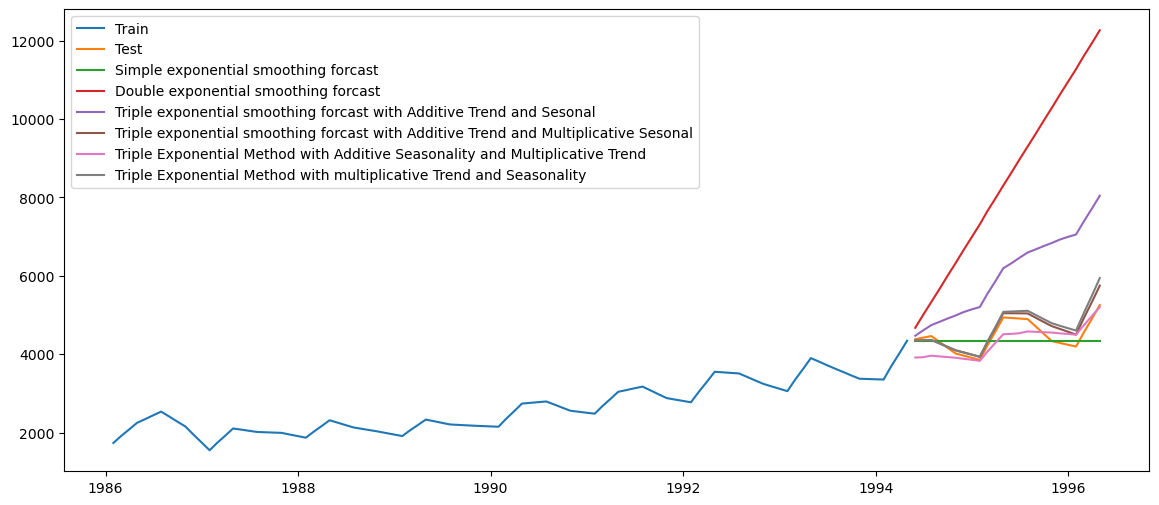

In [58]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.plot(test_pred_mul_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal')
plt.plot(test_pred_ad_mul_texp, label='Triple Exponential Method with Additive Seasonality and Multiplicative Trend')
plt.plot(test_pred_mul_texp, label='Triple Exponential Method with multiplicative Trend and Seasonality')
plt.legend(loc='best')
plt.show()

In [59]:
Evaluation = {"Models":pd.Series(["Simple_Exp","Double_Exp","Triple_Exp_ad","Triple_Exp_mul_ad","Triple_Exp_ad_mul"\
                                  ,"Triple_Exp_mul"]),\
        "Train_RMSE":pd.Series([train_rmse_ses,train_rmse_dexp,train_rmse_ad_texp,train_rmse_mul_ad_texp,train_rmse_ad_mul_texp,train_rmse_mul_texp]),\
        "Test_MAPE(%)":pd.Series([mape_ses,mape_dexp,mape_ad_texp,mape_mul_ad_texp,mape_ad_mul_texp,mape_mul_texp]),\
        "Test_RMSE_Values":pd.Series([test_rmse_ses,test_rmse_dexp,test_rmse_ad_texp,test_rmse_mul_ad_texp,test_rmse_ad_mul_texp,test_rmse_mul_texp])}
table_evaluation=pd.DataFrame(Evaluation)
table_evaluation.sort_values(['Test_MAPE(%)'], inplace=True, ignore_index=True)
table_evaluation

Models  Train_RMSE  Test_MAPE(%)  Test_RMSE_Values
0  Triple_Exp_mul_ad   39.945931      4.101978        233.051205
1     Triple_Exp_mul   39.887973      5.156325        304.559844
2  Triple_Exp_ad_mul  172.299639      5.416359        286.158525
3         Simple_Exp  129.784147      6.620374        382.447742
4      Triple_Exp_ad   44.103022     35.686100       1827.513282
5         Double_Exp  108.708553     89.493160       4549.832585

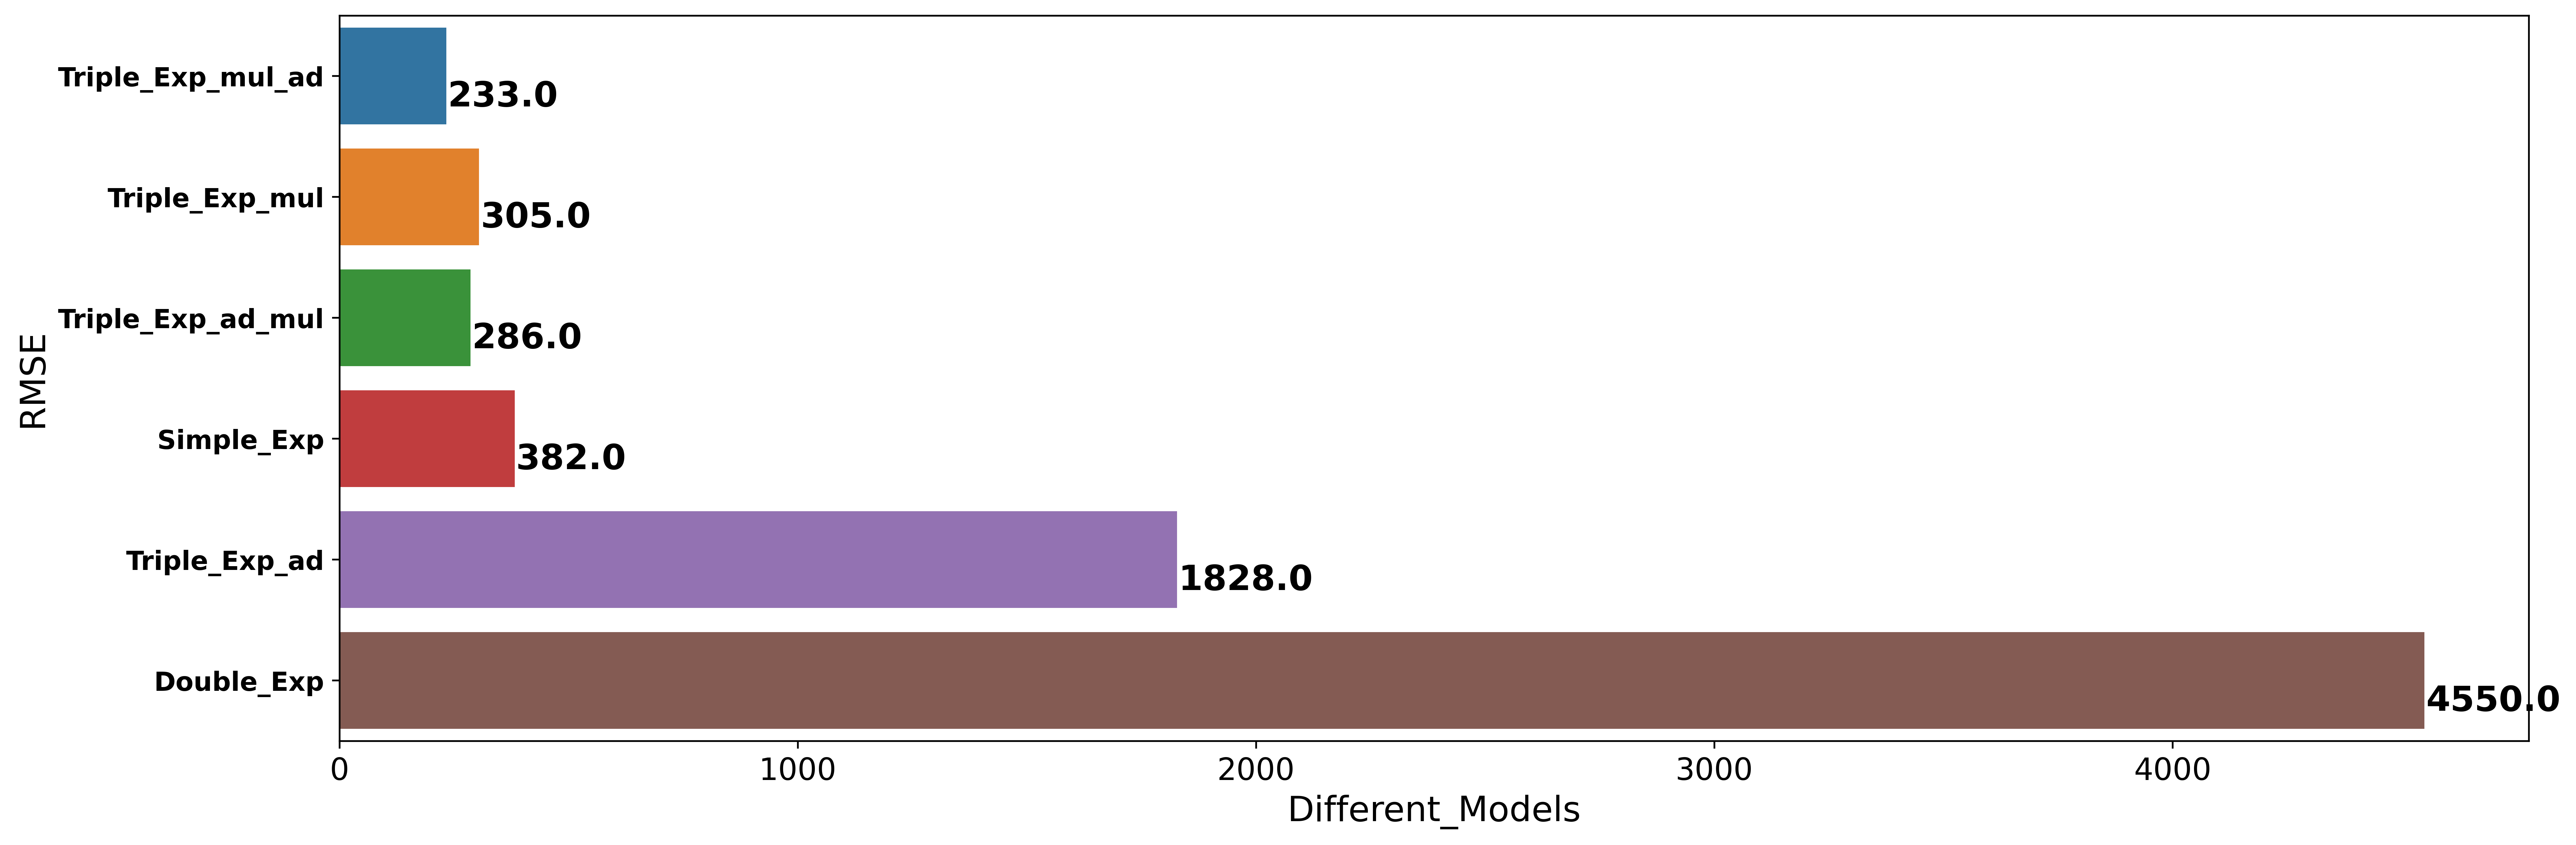

In [60]:
f, axe = plt.subplots(1,1, figsize=(18,6), dpi=500)
sns.barplot(x='Test_RMSE_Values', y='Models', data=table_evaluation, ax = axe)
axe.set_xlabel('Different_Models', size=16)
axe.set_ylabel('RMSE', size=16)
plt.yticks(fontsize=12,fontweight = 'bold')
plt.xticks(fontsize=14)


for i, v in enumerate(np.round(table_evaluation.Test_RMSE_Values.values,0)):
    axe.text(v + 3, i + .25, str(v),
            color = 'black', fontweight = 'bold', fontsize= 16)

plt.show()


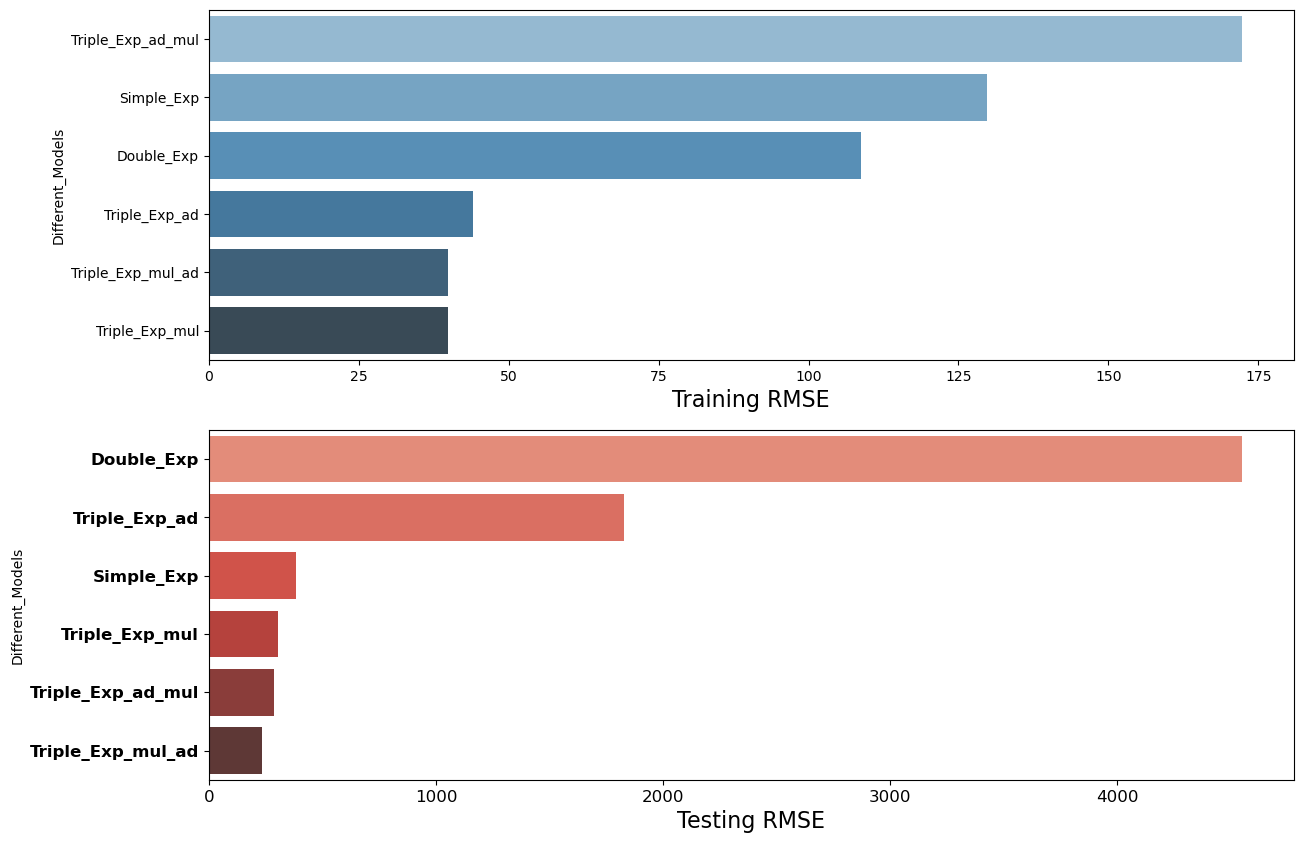

In [61]:
f, axes = plt.subplots(2,1, figsize=(14,10))
plt.yticks(fontsize=12,fontweight = 'bold')
plt.xticks(fontsize=12)
train_rmse = table_evaluation.sort_values(by=['Train_RMSE'], ascending=False)

sns.barplot(x='Train_RMSE', y='Models', data = train_rmse, palette='Blues_d', ax = axes[0])
axes[0].set_xlabel('Training RMSE', size=16)
axes[0].set_ylabel('Different_Models')

test_rmse = table_evaluation.sort_values(by=['Test_RMSE_Values'], ascending=False)

sns.barplot(x='Test_RMSE_Values', y='Models', data = test_rmse, palette='Reds_d', ax = axes[1])
axes[1].set_xlabel('Testing RMSE', size=16)
axes[1].set_ylabel('Different_Models')

plt.show()


In [62]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=4).mean()
    movingSTD = timeseries.rolling(window=4).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['Sales'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

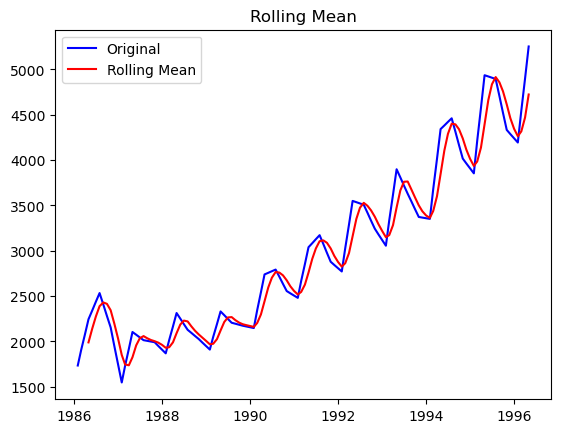

Results of Dickey Fuller Test:
Test Statistic                   0.572599
p-value                          0.986920
#Lags Used                      10.000000
Number of Observations Used    113.000000
Critical Value (1%)             -3.489590
Critical Value (5%)             -2.887477
Critical Value (10%)            -2.580604
dtype: float64


In [63]:
from statsmodels.tsa.stattools import adfuller

sales= pd.DataFrame()
sales['Sales'] = interpolated_month[['Sales']]
test_stationarity(sales)

In [64]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):    
    result = adfuller(series.dropna())  
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    #for key,val in result[4].items():
        #out[f'critical value ({key})']=val
    if result[1] <= 0.05:
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

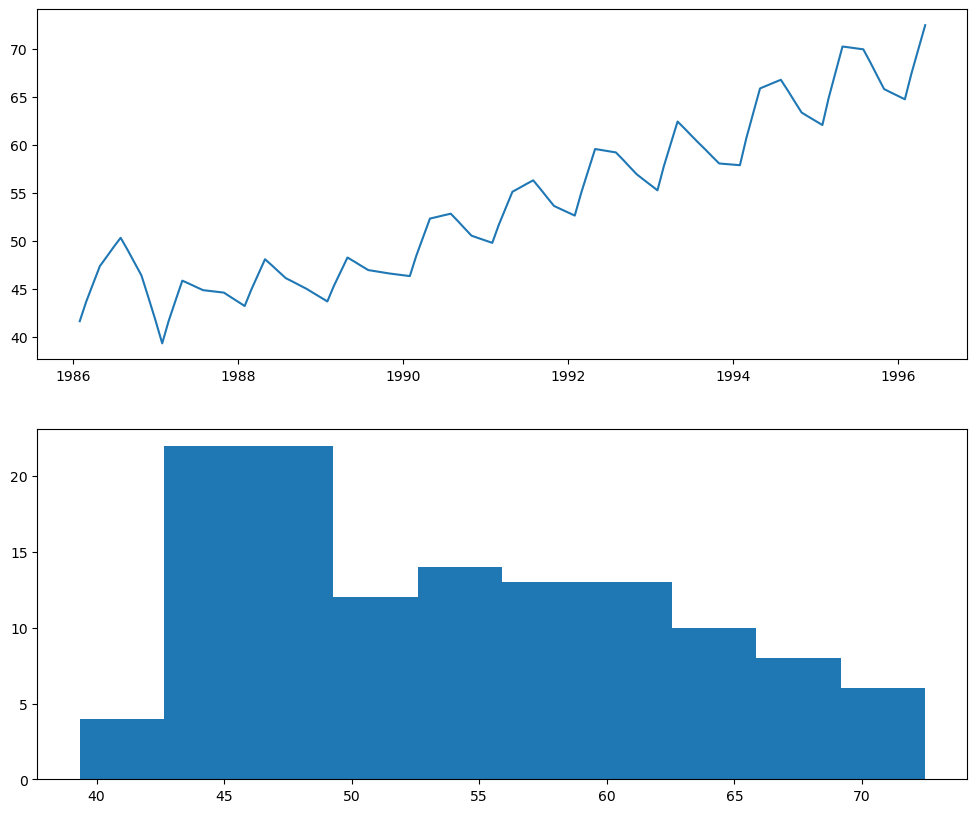

In [65]:
square_root= pd.DataFrame()
square_root = interpolated_month[['Sales']]
square_root['Sales'] = np.sqrt(square_root.Sales)

# line chart
fig=plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(square_root['Sales'])
#Histogram
plt.subplot(212)
plt.hist(square_root['Sales'])
plt.show()

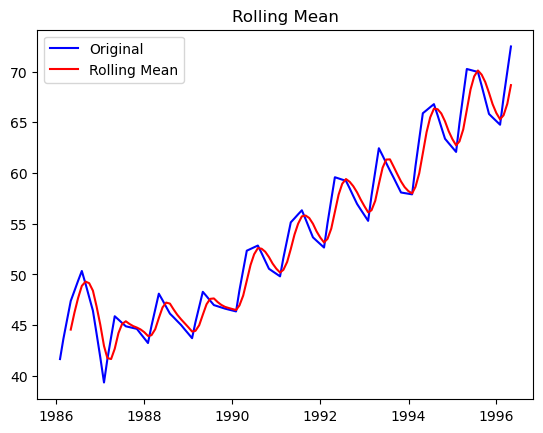

Results of Dickey Fuller Test:
Test Statistic                   0.728012
p-value                          0.990381
#Lags Used                      13.000000
Number of Observations Used    110.000000
Critical Value (1%)             -3.491245
Critical Value (5%)             -2.888195
Critical Value (10%)            -2.580988
dtype: float64


In [66]:
test_stationarity(square_root)


In [67]:
adf_test(square_root.Sales)

Fail to reject the null hypothesis
Data is non-stationary


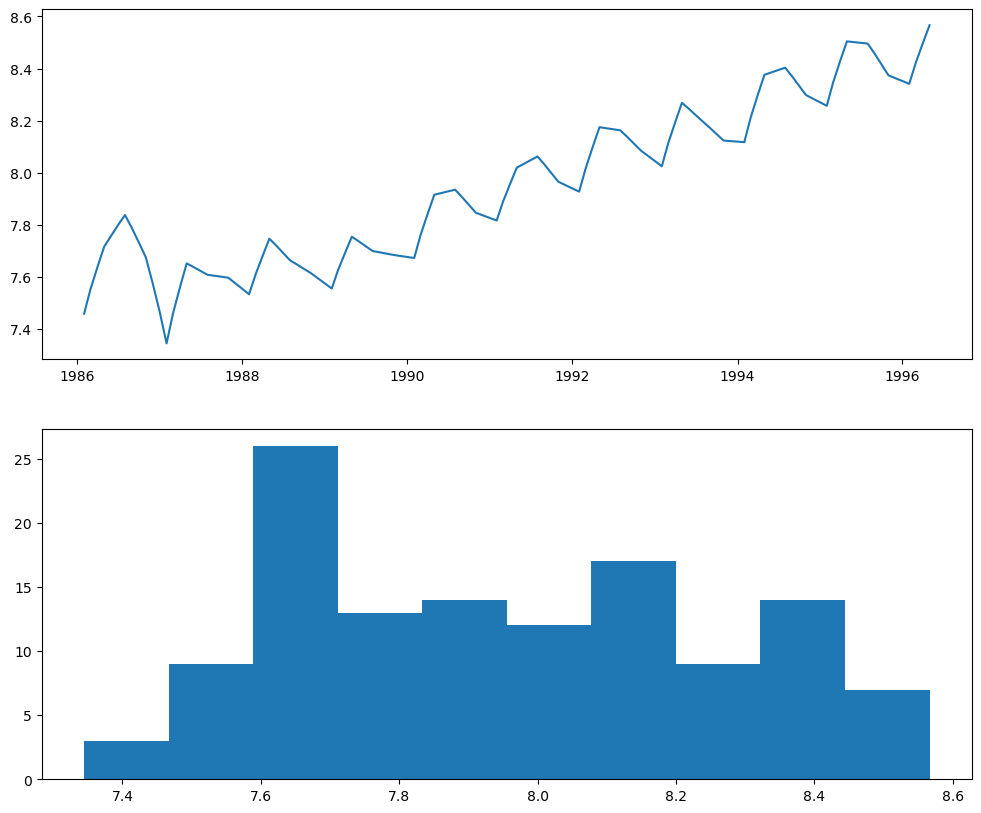

In [68]:
log = pd.DataFrame()
log = interpolated_month[['Sales']]
log['Sales'] = np.log(log.Sales)

# line chart
fig=plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(log['Sales'])
#Histogram
plt.subplot(212)
plt.hist(log['Sales'])
plt.show()

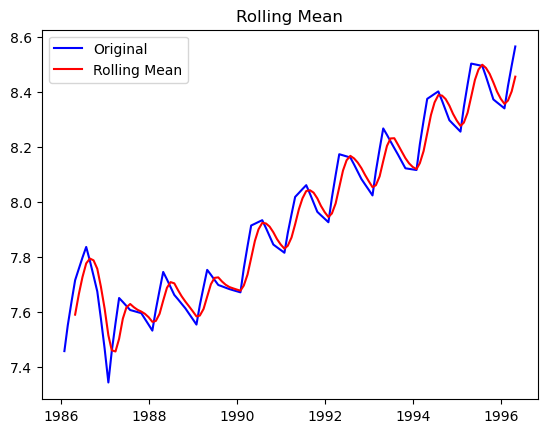

Results of Dickey Fuller Test:
Test Statistic                   0.451508
p-value                          0.983322
#Lags Used                      13.000000
Number of Observations Used    110.000000
Critical Value (1%)             -3.491245
Critical Value (5%)             -2.888195
Critical Value (10%)            -2.580988
dtype: float64


In [69]:
test_stationarity(log)


In [70]:
adf_test(log.Sales)


Fail to reject the null hypothesis
Data is non-stationary


Sales
Date                
1986-01-31  7.458663
1986-02-28  7.552170
1986-03-31  7.637676
1986-04-30  7.716443
1986-05-31  7.758437

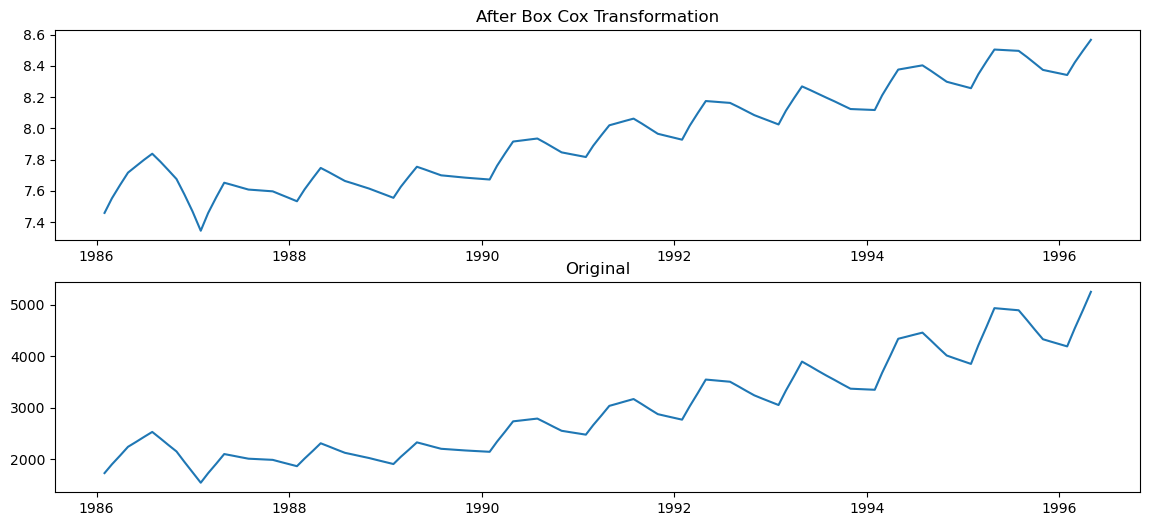

In [71]:
from scipy.stats import boxcox

data_boxcox = pd.DataFrame()
data_boxcox['Sales'] = pd.Series(boxcox(interpolated_month['Sales'], lmbda=0), interpolated_month.index)
display(data_boxcox.head())
fig, axis = plt.subplots(2,figsize=(14,6),)
axis[0].plot(data_boxcox)
axis[0].set_title('After Box Cox Transformation')
axis[1].plot(interpolated_month, label='original')
axis[1].set_title('Original')
plt.show()

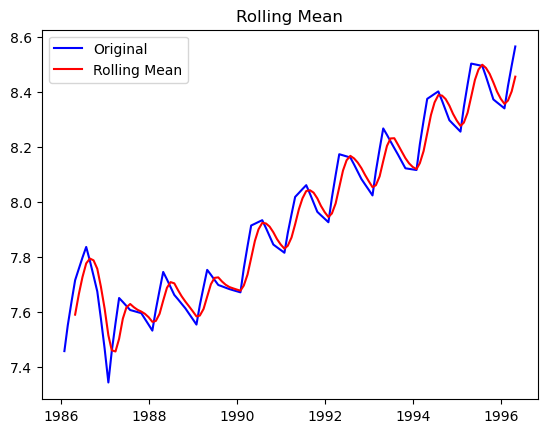

Results of Dickey Fuller Test:
Test Statistic                   0.451508
p-value                          0.983322
#Lags Used                      13.000000
Number of Observations Used    110.000000
Critical Value (1%)             -3.491245
Critical Value (5%)             -2.888195
Critical Value (10%)            -2.580988
dtype: float64


In [72]:
test_stationarity(data_boxcox)


In [73]:
adf_test(data_boxcox)


Fail to reject the null hypothesis
Data is non-stationary


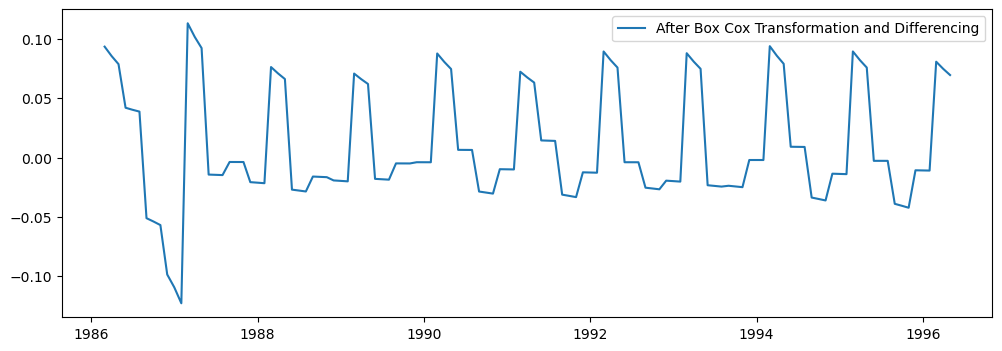

In [74]:
data_boxcox_diff = data_boxcox - data_boxcox.shift()
data_boxcox_diff.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox Transformation and Differencing')
plt.legend(loc='best')
plt.show()

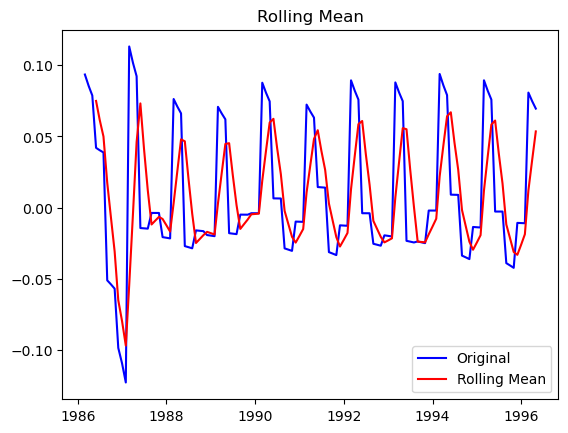

Results of Dickey Fuller Test:
Test Statistic                  -3.030060
p-value                          0.032181
#Lags Used                      12.000000
Number of Observations Used    110.000000
Critical Value (1%)             -3.491245
Critical Value (5%)             -2.888195
Critical Value (10%)            -2.580988
dtype: float64


In [75]:
test_stationarity(data_boxcox_diff)


In [76]:
adf_test(data_boxcox_diff.Sales)


Reject the null hypothesis
Data is stationary


In [77]:
from statsmodels.tsa.arima.model import ARIMA
def evaluate_arima_model(X, arima_order):
    X= X.astype('float32')
    train_size = int(len(X) * 0.70)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
        rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [78]:
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    
                except Exception as e:
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [79]:
from scipy.stats import boxcox
train_data_boxcox = data_boxcox[:100]
test_data_boxcox = data_boxcox[100:]
train_data_boxcox_diff = data_boxcox_diff[:99]
test_data_boxcox_diff = data_boxcox_diff[99:]

In [80]:
p_values = range(0, 1)
d_values = range(0, 1)
q_values = range(0, 1)
evaluate_models(train_data_boxcox_diff, p_values, d_values, q_values)

ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
Best ARIMANone RMSE=inf


In [147]:

model = ARIMA(train_data_boxcox_diff, order=(3, 0, 2))
model_fit = model.fit()
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast'] = y_hat_ar['ar_forecast'].cumsum()
y_hat_ar['ar_forecast'] = y_hat_ar['ar_forecast'].add(data_boxcox.Sales[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast'])


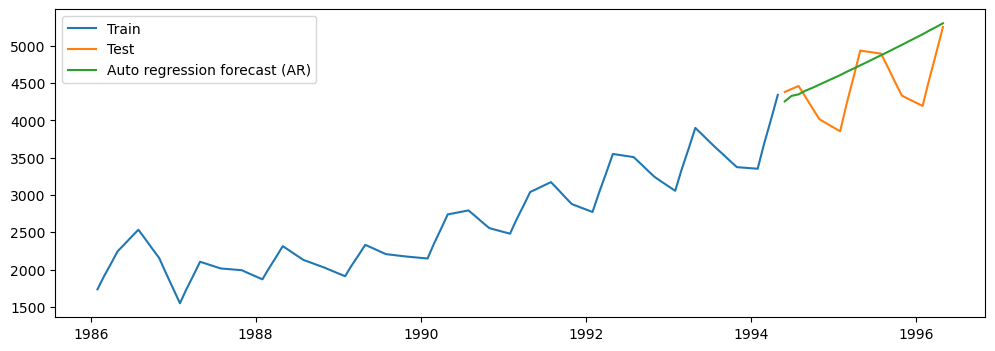

In [82]:
plt.figure(figsize=(12,4))
plt.plot(train_data['Sales'], label='Train')
plt.plot(test_data, label='Test')
plt.plot(y_hat_ar['ar_forecast'][test_data.index.min():], label='Auto regression forecast (AR)')
plt.legend(loc='best')
plt.show()

In [83]:
rmse_ARIMA = np.sqrt(mean_squared_error(test_data, y_hat_ar['ar_forecast'][test_data.index.min():])).round(2)
rmse_ARIMA

476.45

In [84]:
mape_arima = round(np.mean(np.abs((test_data - y_hat_ar['ar_forecast'][test_data.index.min():])/test_data)*100),2)
mape_arima

1994-05-31 00:00:00   NaN
1994-06-30 00:00:00   NaN
1994-07-31 00:00:00   NaN
1994-08-31 00:00:00   NaN
1994-09-30 00:00:00   NaN
1994-10-31 00:00:00   NaN
1994-11-30 00:00:00   NaN
1994-12-31 00:00:00   NaN
1995-01-31 00:00:00   NaN
1995-02-28 00:00:00   NaN
1995-03-31 00:00:00   NaN
1995-04-30 00:00:00   NaN
1995-05-31 00:00:00   NaN
1995-06-30 00:00:00   NaN
1995-07-31 00:00:00   NaN
1995-08-31 00:00:00   NaN
1995-09-30 00:00:00   NaN
1995-10-31 00:00:00   NaN
1995-11-30 00:00:00   NaN
1995-12-31 00:00:00   NaN
1996-01-31 00:00:00   NaN
1996-02-29 00:00:00   NaN
1996-03-31 00:00:00   NaN
1996-04-30 00:00:00   NaN
Sales                 NaN
dtype: float64

In [85]:
model_residual = model_fit.resid
model_residual.mean()


0.00017514416458387934

In [86]:
adf_test(model_residual)


Reject the null hypothesis
Data is stationary


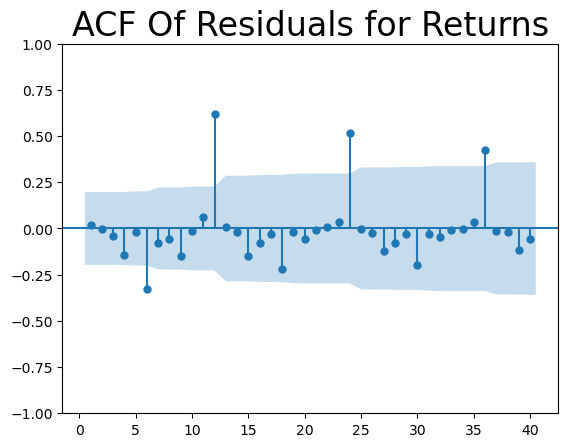

In [87]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(model_residual, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()


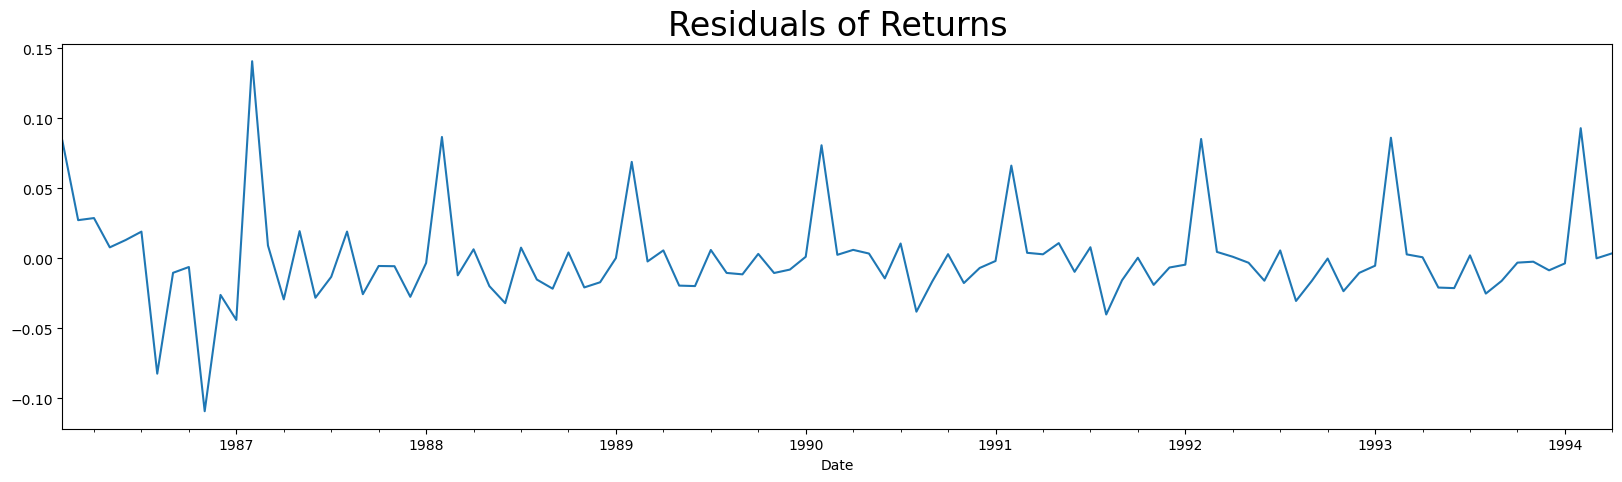

In [88]:
model_residual.plot(figsize=(20,5))
plt.title("Residuals of Returns", size=24)
plt.show()


In [89]:
size = int(np.round(len(df1)*0.70,))

cocacola_train = df1.Sales[:size]
cocacola_validation = df1.Sales[size:]
print('Dataset %d, Validation %d' % (len(cocacola_train), len(cocacola_validation)))
cocacola_train.to_csv('cocacola_train.csv', header=False)
cocacola_validation.to_csv('cocacola_validation.csv', header=False)

Dataset 29, Validation 13


In [90]:
print('Dataset %d, Validation %d' % (len(train_data), len(test_data)))
train_data.to_csv('cocacola_train.csv', header=False)
test_data.to_csv('cocacola_validation.csv', header=False)


Dataset 100, Validation 24


In [91]:
train = pd.read_csv('cocacola_train.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
train = train.astype('int64')
p_values = range(0, 1)
d_values = range(0, 1)
q_values = range(0, 1)
evaluate_models(train.values, p_values, d_values, q_values)

Found input variables with inconsistent numbers of samples: [30, 1]
Best ARIMANone RMSE=inf


In [92]:
size = int(np.round(len(cocacola_train)*0.70,))
train_data = cocacola_train[:size]
test_data = cocacola_train[size:]
print('Dataset %d, Validation %d' % (len(train_data), len(test_data)))

Dataset 20, Validation 9


In [93]:
print('Dataset %d, Validation %d' % (len(train_data), len(test_data)))


Dataset 20, Validation 9


In [95]:
import warnings
warnings.filterwarnings('ignore')
model = ARIMA(train_data,order=(4, 1, 4))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   20
Model:                 ARIMA(4, 1, 4)   Log Likelihood         -6768116825.713
Date:                Mon, 01 Jan 2024   AIC                    13536233669.426
Time:                        18:26:03   BIC                    13536233677.926
Sample:                    01-01-1986   HQIC                   13536233670.865
                         - 10-01-1990                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       2.191e-07   3.67e-10    596.712      0.000    2.18e-07     2.2e-07
ar.L2      -3.102e-07   3.05e-10  -1015.832      0.000   -3.11e-07    -3.1e-07
ar.L3      -7.757e-08   4.02e-10   -193.077      0.000   -7.84e-08   -7.68e-08
ar.L4       1.662e-07   3.09e-10    538.847      0.000    1.66e-07    1.67e-07
ma.L1       2.191e-07   3.67e-10    596.693      0.000    2.18e-07     2.2e-07
ma.L2      -3.102e-07   3.05e-10  -1015.852      0.000   -3.11e-07    -3.1e-07
ma.L3      -7.757e-08   4.02e-10   -193.080      0.000   -7.84e-08   -7.68e-08
ma.L4       1.662e-07   3.09e-10    538.839      0.000    1.66e-07    1.67e-07
sigma2         0.0002    1.4e-13   1.08e+09      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.63   Jarque-Bera (JB):                 0.57
Prob(Q):                              0.43   Prob(JB):                         0.75
Heteroskedasticity (H):               0.36   Skew:                             0.20
Prob(H) (two-sided):                  0.24   Kurtosis:                         2.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.07e+17. Standard errors may be unstable.
"""

In [96]:
start=len(train_data)
end=len(cocacola_train)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels')
predictions = predictions.rename('ARIMA(4,1,4) Predictions')

In [97]:
for i in range(len(test_data)):
    print(f"predicted={predictions[i]:<.10}, expected={test_data[i]}")

predicted=2556.009758, expected=2480.973999
predicted=2556.010093, expected=3039.522995
predicted=2556.010147, expected=3172.115997
predicted=2556.010069, expected=2879.000999
predicted=2556.010069, expected=2772.0
predicted=2556.010069, expected=3550.0
predicted=2556.010069, expected=3508.0
predicted=2556.010069, expected=3243.859993
predicted=2556.010069, expected=3056.0


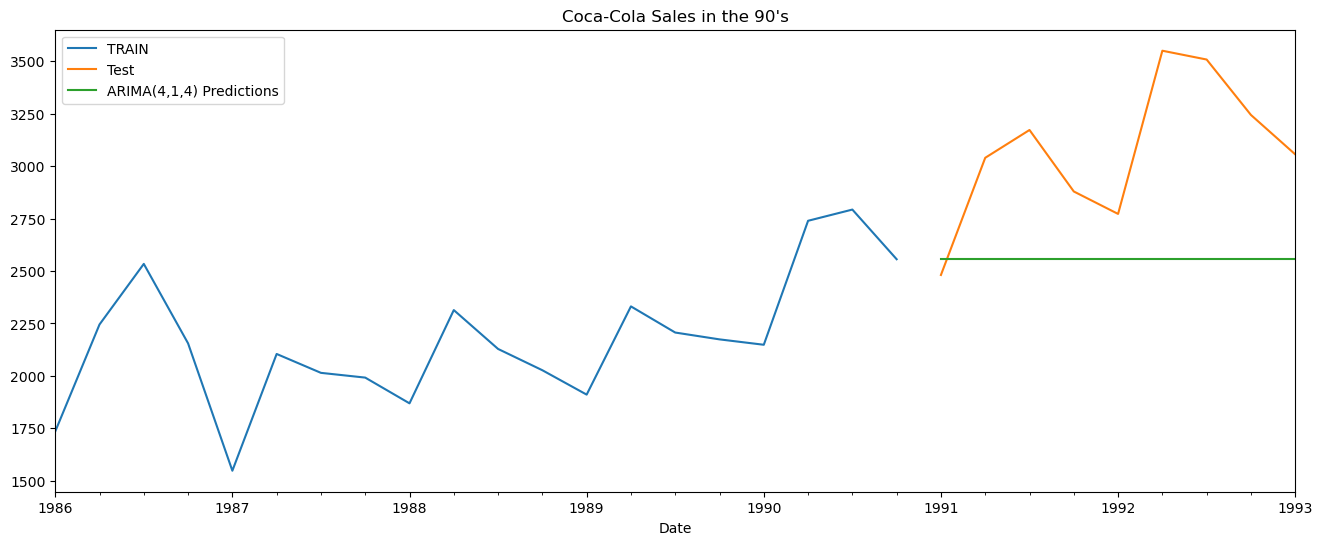

In [98]:
title = "Coca-Cola Sales in the 90's"
ylabel='Sales'
xlabel='' 

train_data.plot(legend=True,label='TRAIN' ,figsize=(16,6),title=title)
test_data.plot(legend=True,label='Test',figsize=(16,6),title=title)
predictions.plot(legend=True)
plt.show()

<Axes: xlabel='Date'>

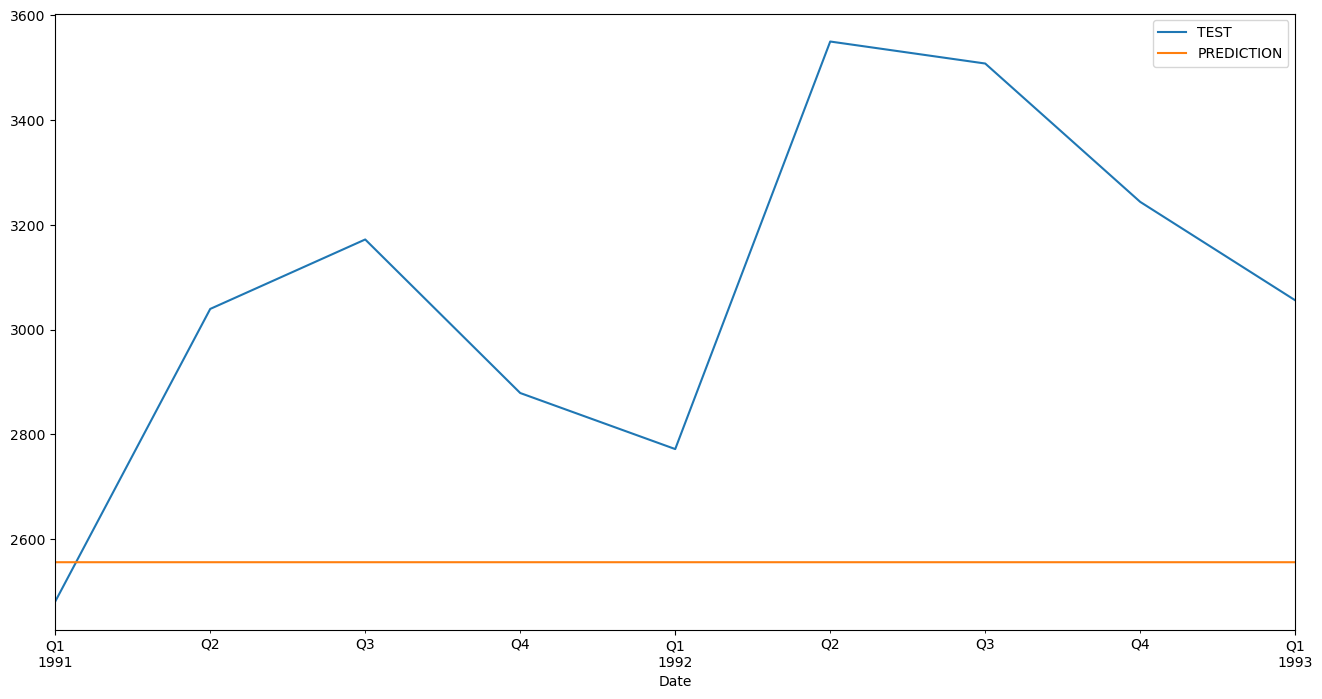

In [99]:
test_data.plot(legend=True,label='TEST',figsize=(16,8))
predictions.plot(legend=True,label='PREDICTION',xlim=['1991-01-01','1993-01-01'])

In [100]:
from statsmodels.tools.eval_measures import rmse

rmse_arima = rmse(test_data, predictions)
rmse_arima.round(2)

613.5

In [101]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_data_boxcox, order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit= model.fit()
y_hat_sarima = data_boxcox_diff.copy()

In [102]:
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

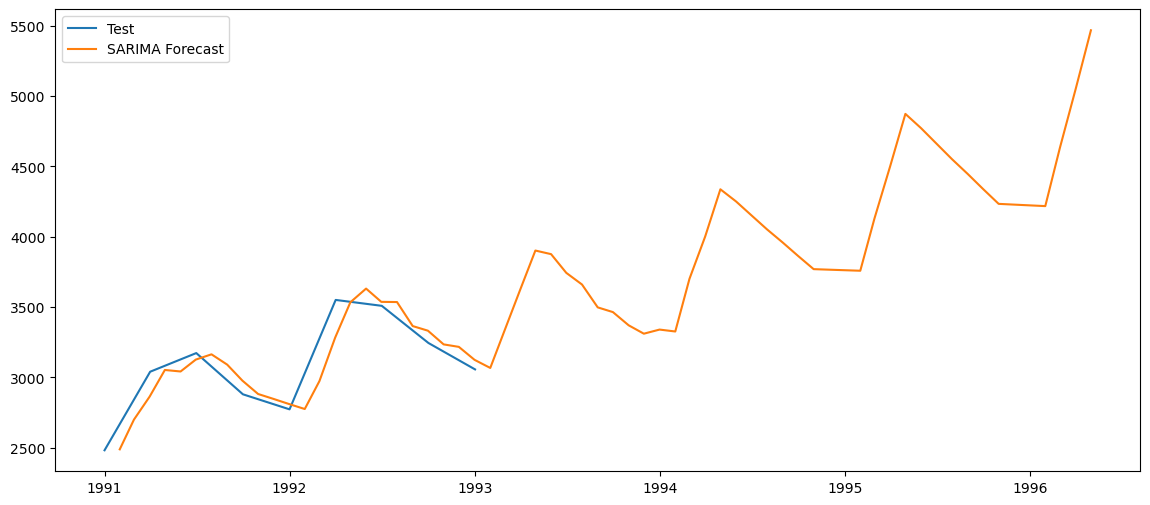

In [103]:
plt.figure(figsize=(14,6))
plt.plot(test_data, label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test_data.index.min():], label='SARIMA Forecast')
plt.legend(loc='best')
plt.show()

In [104]:
print("9:", test_data.index)
print("64:", y_hat_ar['ar_forecast'][test_data.index.min():].index)


9: DatetimeIndex(['1991-01-01', '1991-04-01', '1991-07-01', '1991-10-01',
               '1992-01-01', '1992-04-01', '1992-07-01', '1992-10-01',
               '1993-01-01'],
              dtype='datetime64[ns]', name='Date', freq=None)
64: DatetimeIndex(['1991-01-31', '1991-02-28', '1991-03-31', '1991-04-30',
               '1991-05-31', '1991-06-30', '1991-07-31', '1991-08-31',
               '1991-09-30', '1991-10-31', '1991-11-30', '1991-12-31',
               '1992-01-31', '1992-02-29', '1992-03-31', '1992-04-30',
               '1992-05-31', '1992-06-30', '1992-07-31', '1992-08-31',
               '1992-09-30', '1992-10-31', '1992-11-30', '1992-12-31',
               '1993-01-31', '1993-02-28', '1993-03-31', '1993-04-30',
               '1993-05-31', '1993-06-30', '1993-07-31', '1993-08-31',
               '1993-09-30', '1993-10-31', '1993-11-30', '1993-12-31',
               '1994-01-31', '1994-02-28', '1994-03-31', '1994-04-30',
               '1994-05-31', '1994-06-30', '1994-

In [105]:
len(np.sqrt(test_data))

9

In [106]:
len(y_hat_ar['ar_forecast'][test_data.index.min():])

64

In [107]:
print("Index of test_data:", test_data.index)
print("Index of sqrt(test_data):", np.sqrt(test_data).index)
print("Index of forecasted values:", y_hat_ar['ar_forecast'][test_data.index.min():].index)


Index of test_data: DatetimeIndex(['1991-01-01', '1991-04-01', '1991-07-01', '1991-10-01',
               '1992-01-01', '1992-04-01', '1992-07-01', '1992-10-01',
               '1993-01-01'],
              dtype='datetime64[ns]', name='Date', freq=None)
Index of sqrt(test_data): DatetimeIndex(['1991-01-01', '1991-04-01', '1991-07-01', '1991-10-01',
               '1992-01-01', '1992-04-01', '1992-07-01', '1992-10-01',
               '1993-01-01'],
              dtype='datetime64[ns]', name='Date', freq=None)
Index of forecasted values: DatetimeIndex(['1991-01-31', '1991-02-28', '1991-03-31', '1991-04-30',
               '1991-05-31', '1991-06-30', '1991-07-31', '1991-08-31',
               '1991-09-30', '1991-10-31', '1991-11-30', '1991-12-31',
               '1992-01-31', '1992-02-29', '1992-03-31', '1992-04-30',
               '1992-05-31', '1992-06-30', '1992-07-31', '1992-08-31',
               '1992-09-30', '1992-10-31', '1992-11-30', '1992-12-31',
               '1993-01-31', '19

In [109]:
rmse_ARIMA = test_data.index.intersection(y_hat_ar['ar_forecast'].index)
rmse_ARIMA

DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)

In [110]:
mape_arima = round(np.mean(np.abs((test_data - y_hat_ar['ar_forecast'][test_data.index.min():])/test_data)*100),2)
mape_arima

nan

In [111]:
model_residual = model_fit.resid
model_residual.mean()

0.03704257281134358

In [112]:
adf_test(model_residual)


Reject the null hypothesis
Data is stationary


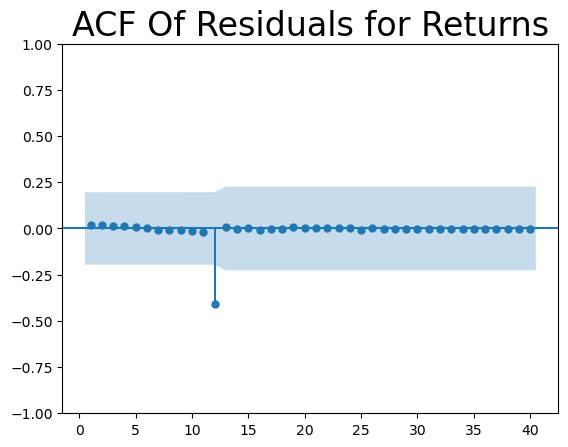

In [113]:
plot_acf(model_residual, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

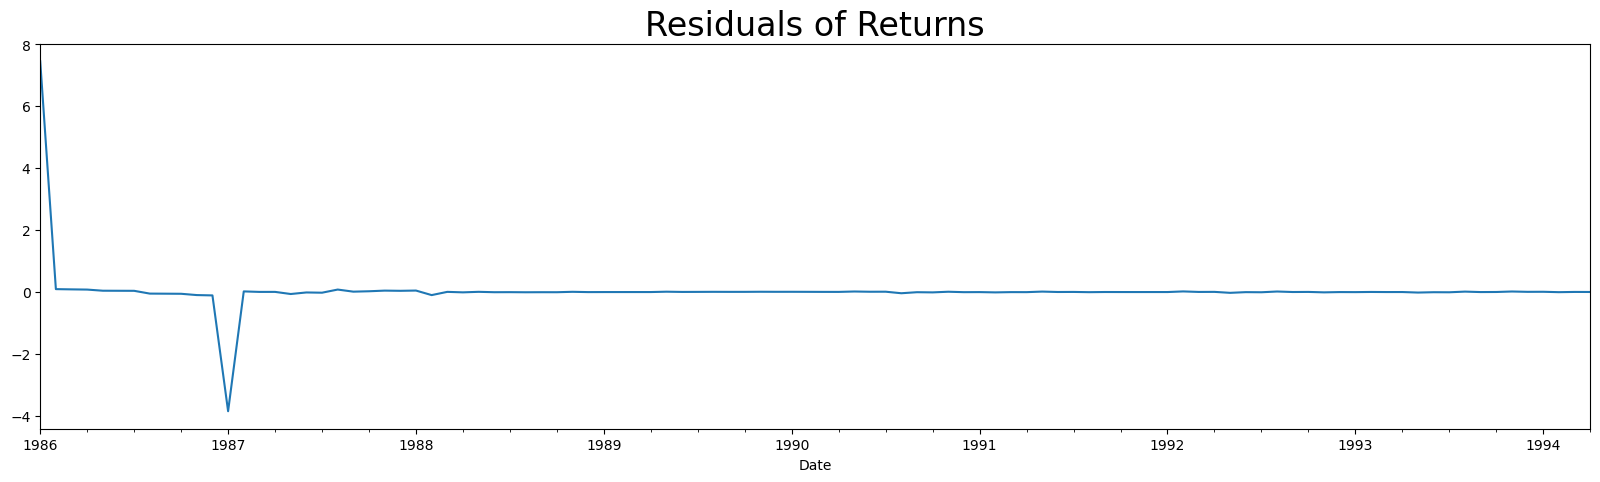

In [114]:
model_residual.plot(figsize=(20,5))
plt.title("Residuals of Returns", size=24)
plt.show()

In [115]:
size = int(np.round(len(df1)*0.70,))

cocacola_train = df1.Sales[:size]
cocacola_validation = df1.Sales[size:]
print('Dataset %d, Validation %d' % (len(cocacola_train), len(cocacola_validation)))
cocacola_train.to_csv('cocacola_train.csv', header=False)
cocacola_validation.to_csv('cocacola_validation.csv', header=False)

Dataset 29, Validation 13


In [116]:
print('Dataset %d, Validation %d' % (len(train_data), len(test_data)))
train_data.to_csv('cocacola_train.csv', header=False)
test_data.to_csv('cocacola_validation.csv', header=False)

Dataset 20, Validation 9


In [120]:
train = pd.read_csv('cocacola_train.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
train = train.astype('int64')
# evaluate parameters
p_values = range(0, 1)
d_values = range(0, 1)
q_values = range(0, 1)
evaluate_models(train.values, p_values, d_values, q_values)

Found input variables with inconsistent numbers of samples: [6, 1]
Best ARIMANone RMSE=inf


In [121]:
size = int(np.round(len(cocacola_train)*0.70,))

train_data = cocacola_train[:size]
test_data = cocacola_train[size:]
print('Dataset %d, Validation %d' % (len(train_data), len(test_data)))

Dataset 20, Validation 9


In [123]:
model = ARIMA(train_data,order=(4, 1, 4))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   20
Model:                 ARIMA(4, 1, 4)   Log Likelihood         -6768116825.713
Date:                Mon, 01 Jan 2024   AIC                    13536233669.426
Time:                        18:29:55   BIC                    13536233677.926
Sample:                    01-01-1986   HQIC                   13536233670.865
                         - 10-01-1990                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       2.191e-07   3.67e-10    596.712      0.000    2.18e-07     2.2e-07
ar.L2      -3.102e-07   3.05e-10  -1015.832      0.000   -3.11e-07    -3.1e-07
ar.L3      -7.757e-08   4.02e-10   -193.077      0.000   -7.84e-08   -7.68e-08
ar.L4       1.662e-07   3.09e-10    538.847      0.000    1.66e-07    1.67e-07
ma.L1       2.191e-07   3.67e-10    596.693      0.000    2.18e-07     2.2e-07
ma.L2      -3.102e-07   3.05e-10  -1015.852      0.000   -3.11e-07    -3.1e-07
ma.L3      -7.757e-08   4.02e-10   -193.080      0.000   -7.84e-08   -7.68e-08
ma.L4       1.662e-07   3.09e-10    538.839      0.000    1.66e-07    1.67e-07
sigma2         0.0002    1.4e-13   1.08e+09      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.63   Jarque-Bera (JB):                 0.57
Prob(Q):                              0.43   Prob(JB):                         0.75
Heteroskedasticity (H):               0.36   Skew:                             0.20
Prob(H) (two-sided):                  0.24   Kurtosis:                         2.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.07e+17. Standard errors may be unstable.
"""

In [124]:
start=len(train_data)
end=len(cocacola_train)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels')
predictions = predictions.rename('ARIMA(4,1,4) Predictions')


In [125]:
for i in range(len(test_data)):
    print(f"predicted={predictions[i]:<.10}, expected={test_data[i]}")

predicted=2556.009758, expected=2480.973999
predicted=2556.010093, expected=3039.522995
predicted=2556.010147, expected=3172.115997
predicted=2556.010069, expected=2879.000999
predicted=2556.010069, expected=2772.0
predicted=2556.010069, expected=3550.0
predicted=2556.010069, expected=3508.0
predicted=2556.010069, expected=3243.859993
predicted=2556.010069, expected=3056.0


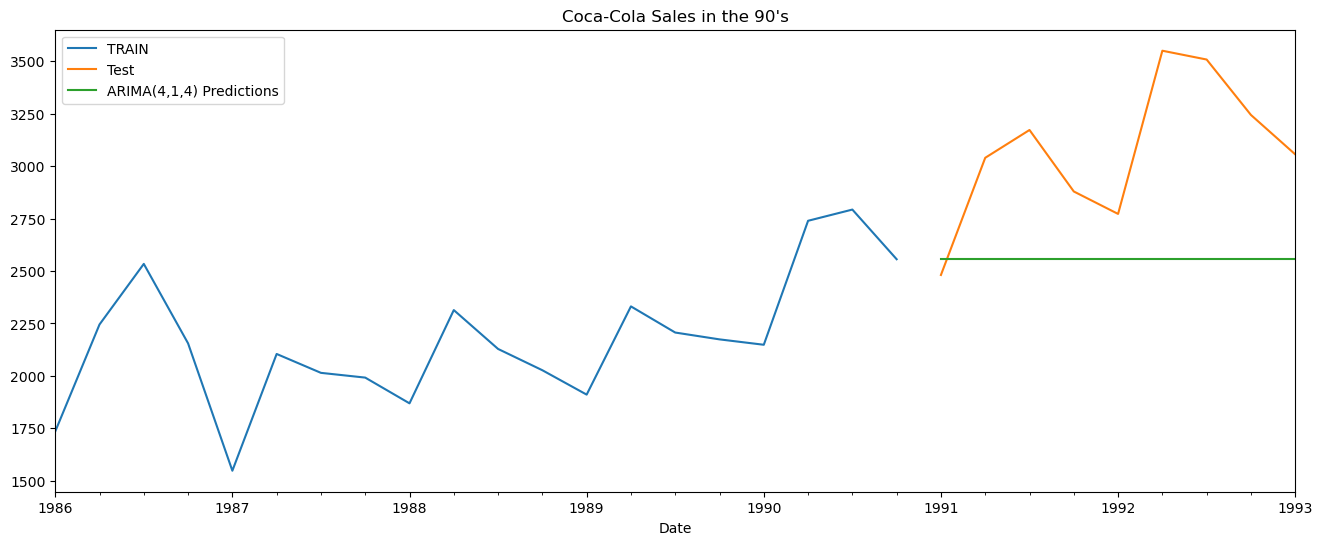

In [126]:
title = "Coca-Cola Sales in the 90's"
ylabel='Sales'
xlabel='' 

train_data.plot(legend=True,label='TRAIN' ,figsize=(16,6),title=title)
test_data.plot(legend=True,label='Test',figsize=(16,6),title=title)
predictions.plot(legend=True)
plt.show()

<Axes: xlabel='Date'>

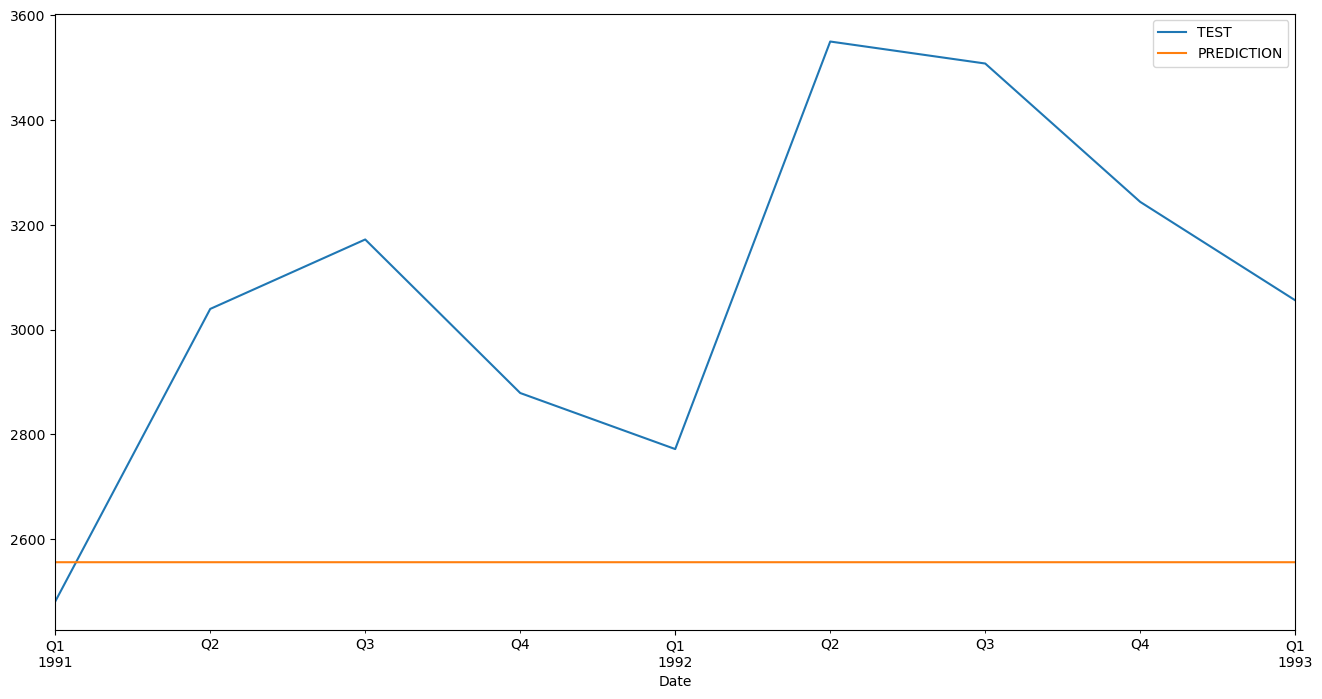

In [127]:
test_data.plot(legend=True,label='TEST',figsize=(16,8))
predictions.plot(legend=True,label='PREDICTION',xlim=['1991-01-01','1993-01-01'])

In [128]:
from statsmodels.tools.eval_measures import rmse

rmse_arima = rmse(test_data, predictions)
rmse_arima.round(2)

613.5

In [129]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_data_boxcox, order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit= model.fit()
y_hat_sarima = data_boxcox_diff.copy()

In [130]:
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

In [133]:
mape_sarima = round(np.mean(np.abs((test_data - y_hat_sarima['sarima_forecast'][test_data.index.min():])/test_data)*100),2)
mape_sarima

nan

In [134]:
model_residual = model_fit.resid
model_residual.mean()

0.03704257281134358

In [135]:
adf_test(model_residual)


Reject the null hypothesis
Data is stationary


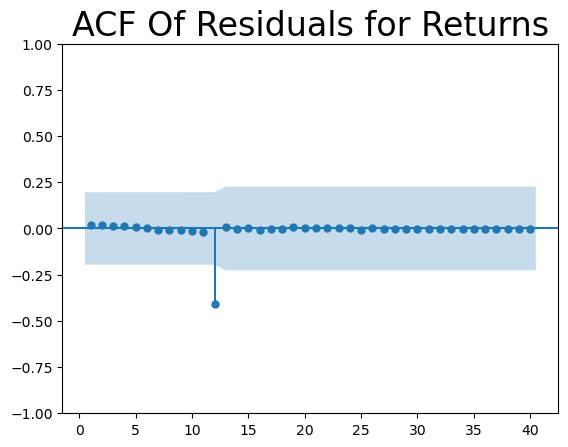

In [136]:
plot_acf(model_residual, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

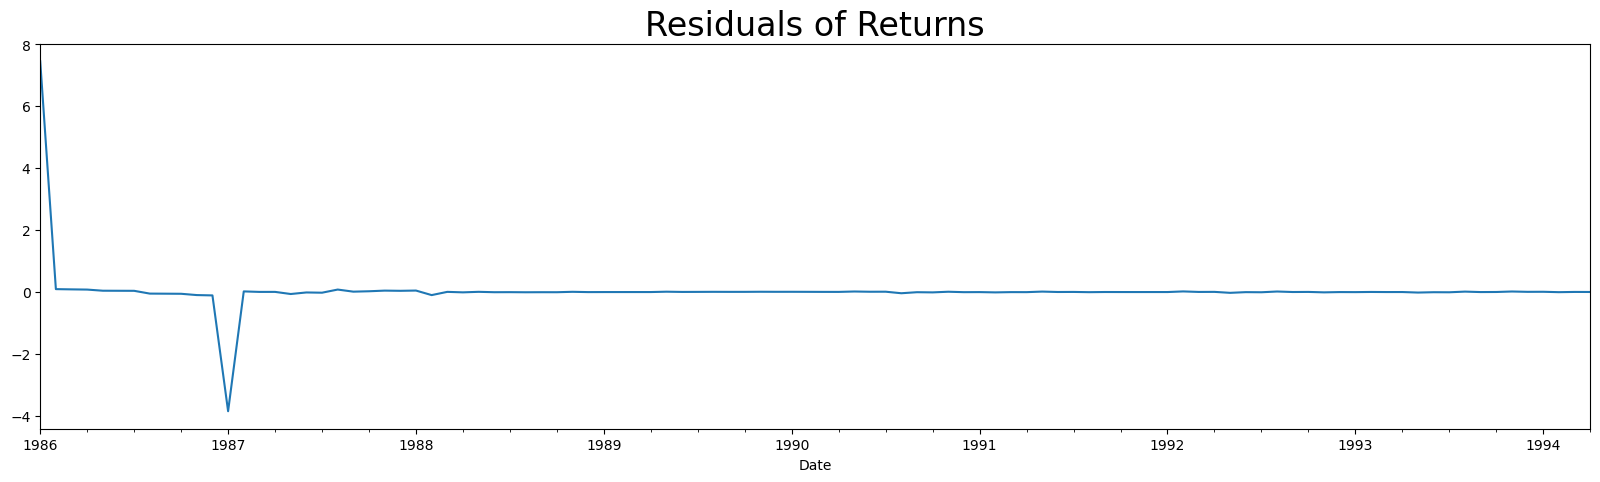

In [137]:
model_residual.plot(figsize=(20,5))
plt.title("Residuals of Returns", size=24)
plt.show()

In [ ]:
Evaluation = {"Models":pd.Series(["Simple_Exponential","Double_Exponential","Triple_Exp_additive","Triple_Exp_mul_ad","Triple_Exp_ad_mul"\
                                  ,"Triple_Exp_multiplicative","ARIMA","SARIMA"]),\
        "MAPE(%)":pd.Series([mape_ses,mape_dexp,mape_ad_texp,mape_mul_ad_texp,mape_ad_mul_texp,mape_mul_texp,mape_arima,mape_sarima]),\
        "RMSE_Values":pd.Series([test_rmse_ses,test_rmse_dexp,test_rmse_ad_texp,test_rmse_mul_ad_texp,test_rmse_ad_mul_texp,test_rmse_mul_texp,rmse_ARIMA])}
table_evaluation=pd.DataFrame(Evaluation)
table_evaluation.sort_values(['RMSE_Values'], inplace=True, ignore_index=True)
table_evaluation

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


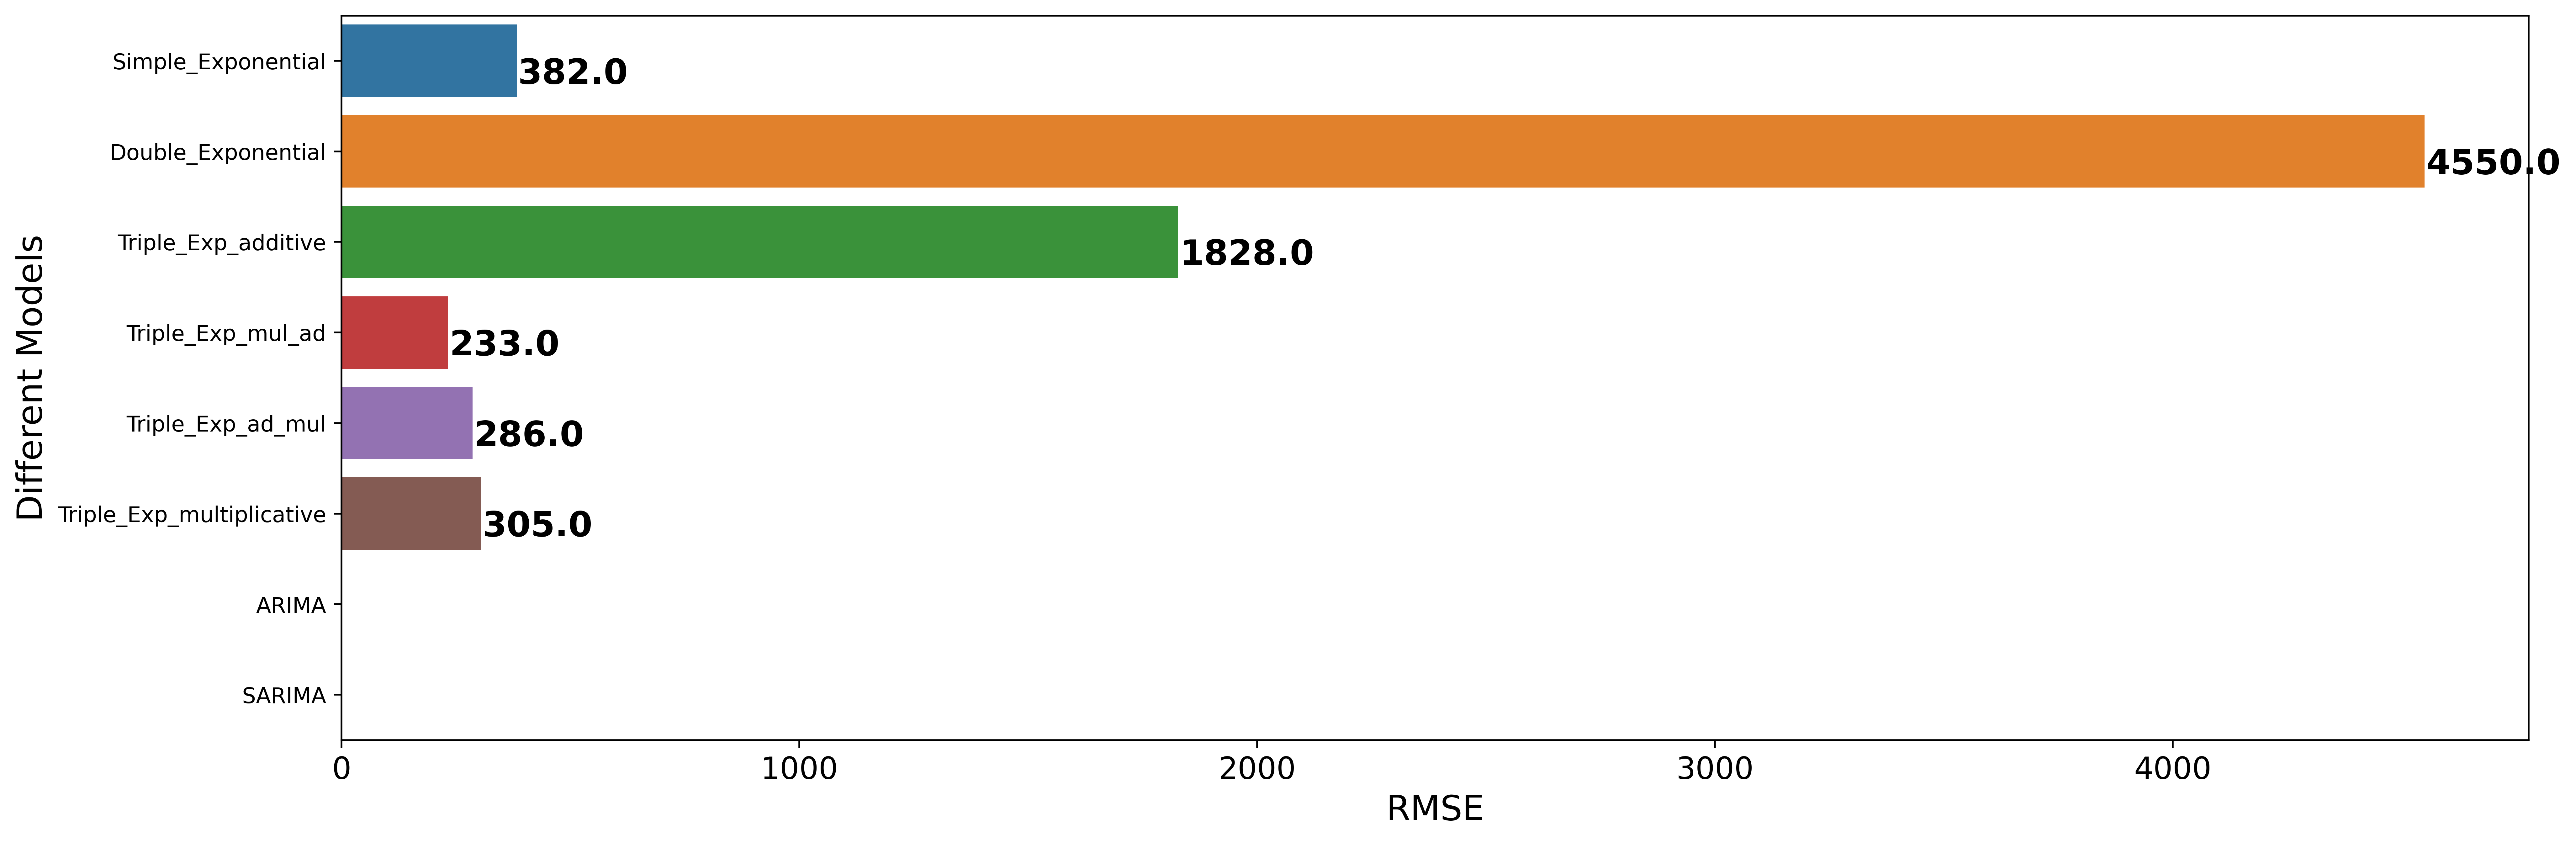

In [148]:
table_evaluation['RMSE_Values'] = pd.to_numeric(table_evaluation['RMSE_Values'])

f, axe = plt.subplots(1, 1, figsize=(18, 6), dpi=500)
sns.barplot(x='RMSE_Values', y='Models', data=table_evaluation, ax=axe)
axe.set_xlabel('RMSE', size=16)
axe.set_ylabel('Different Models', size=16)
plt.xticks(fontsize=14)

for i, v in enumerate(np.round(table_evaluation.RMSE_Values.values, 0)):
    axe.text(v + 3, i + .25, str(v),
             color='black', fontweight='bold', fontsize=16)

plt.show()

In [149]:
interpolated_month.reset_index(inplace=True)
interpolated_month['t'] = np.arange(1,len(interpolated_month)+1)
interpolated_month['t_squared'] = np.square(interpolated_month.t)
interpolated_month["month"] = interpolated_month.Date.dt.strftime("%b") # month extraction
interpolated_month["year"] = interpolated_month.Date.dt.strftime("%Y") # year extraction
months = pd.get_dummies(interpolated_month['month'])
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
cocacola = pd.concat([interpolated_month,months],axis=1)
cocacola['log_sales'] = np.log(cocacola['Sales'])
cocacola

Date        Sales    t  t_squared month  year  Jan  Feb  Mar  Apr  \
0   1986-01-31  1734.827000    1          1   Jan  1986    1    0    0    0   
1   1986-02-28  1904.871666    2          4   Feb  1986    0    1    0    0   
2   1986-03-31  2074.916333    3          9   Mar  1986    0    0    1    0   
3   1986-04-30  2244.960999    4         16   Apr  1986    0    0    0    1   
4   1986-05-31  2341.242330    5         25   May  1986    0    0    0    0   
..         ...          ...  ...        ...   ...   ...  ...  ...  ...  ...   
119 1995-12-31  4240.333333  120      14400   Dec  1995    0    0    0    0   
120 1996-01-31  4194.000000  121      14641   Jan  1996    1    0    0    0   
121 1996-02-29  4547.000000  122      14884   Feb  1996    0    1    0    0   
122 1996-03-31  4900.000000  123      15129   Mar  1996    0    0    1    0   
123 1996-04-30  5253.000000  124      15376   Apr  1996    0    0    0    1   

     May  Jun  Jul  Aug  Sep  Oct  Nov  Dec  log_sales  
0      0    0    0    0    0    0    0    0   7.458663  
1      0    0    0    0    0    0    0    0   7.552170  
2      0    0    0    0    0    0    0    0   7.637676  
3      0    0    0    0    0    0    0    0   7.716443  
4      1    0    0    0    0    0    0    0   7.758437  
..   ...  ...  ...  ...  ...  ...  ...  ...        ...  
119    0    0    0    0    0    0    0    1   8.352397  
120    0    0    0    0    0    0    0    0   8.341410  
121    0    0    0    0    0    0    0    0   8.422223  
122    0    0    0    0    0    0    0    0   8.496990  
123    0    0    0    0    0    0    0    0   8.566555  

[124 rows x 19 columns]

<Axes: xlabel='month', ylabel='year'>

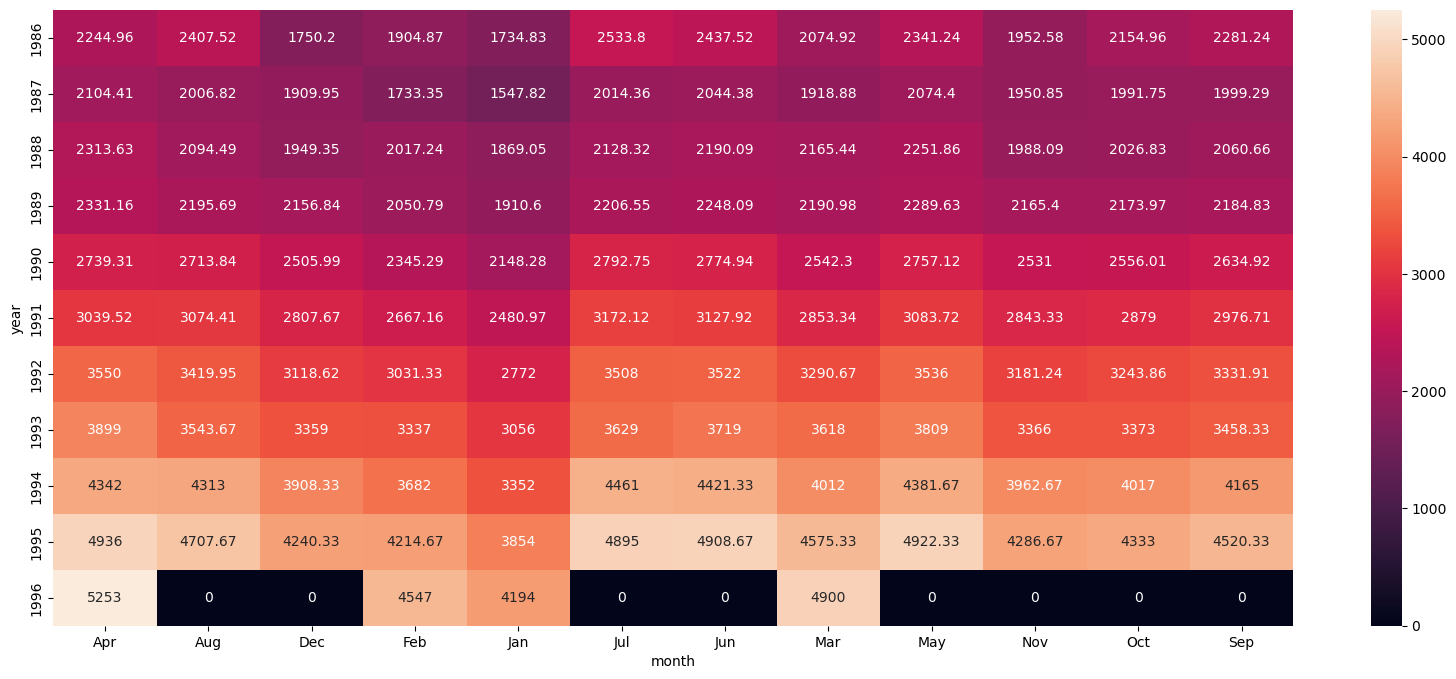

In [150]:
plt.figure(figsize=(20,8))
heatmap_y_month = pd.pivot_table(data=cocacola,values="Sales",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

In [151]:
size = 100

train_data = cocacola.iloc[:size]
test_data = cocacola.iloc[size:]

In [152]:
train_data


Date        Sales    t  t_squared month  year  Jan  Feb  Mar  Apr  \
0  1986-01-31  1734.827000    1          1   Jan  1986    1    0    0    0   
1  1986-02-28  1904.871666    2          4   Feb  1986    0    1    0    0   
2  1986-03-31  2074.916333    3          9   Mar  1986    0    0    1    0   
3  1986-04-30  2244.960999    4         16   Apr  1986    0    0    0    1   
4  1986-05-31  2341.242330    5         25   May  1986    0    0    0    0   
..        ...          ...  ...        ...   ...   ...  ...  ...  ...  ...   
95 1993-12-31  3359.000000   96       9216   Dec  1993    0    0    0    0   
96 1994-01-31  3352.000000   97       9409   Jan  1994    1    0    0    0   
97 1994-02-28  3682.000000   98       9604   Feb  1994    0    1    0    0   
98 1994-03-31  4012.000000   99       9801   Mar  1994    0    0    1    0   
99 1994-04-30  4342.000000  100      10000   Apr  1994    0    0    0    1   

    May  Jun  Jul  Aug  Sep  Oct  Nov  Dec  log_sales  
0     0    0    0    0    0    0    0    0   7.458663  
1     0    0    0    0    0    0    0    0   7.552170  
2     0    0    0    0    0    0    0    0   7.637676  
3     0    0    0    0    0    0    0    0   7.716443  
4     1    0    0    0    0    0    0    0   7.758437  
..  ...  ...  ...  ...  ...  ...  ...  ...        ...  
95    0    0    0    0    0    0    0    1   8.119399  
96    0    0    0    0    0    0    0    0   8.117312  
97    0    0    0    0    0    0    0    0   8.211211  
98    0    0    0    0    0    0    0    0   8.297045  
99    0    0    0    0    0    0    0    0   8.376090  

[100 rows x 19 columns]

In [153]:
test_data


Date        Sales    t  t_squared month  year  Jan  Feb  Mar  Apr  \
100 1994-05-31  4381.666667  101      10201   May  1994    0    0    0    0   
101 1994-06-30  4421.333333  102      10404   Jun  1994    0    0    0    0   
102 1994-07-31  4461.000000  103      10609   Jul  1994    0    0    0    0   
103 1994-08-31  4313.000000  104      10816   Aug  1994    0    0    0    0   
104 1994-09-30  4165.000000  105      11025   Sep  1994    0    0    0    0   
105 1994-10-31  4017.000000  106      11236   Oct  1994    0    0    0    0   
106 1994-11-30  3962.666667  107      11449   Nov  1994    0    0    0    0   
107 1994-12-31  3908.333333  108      11664   Dec  1994    0    0    0    0   
108 1995-01-31  3854.000000  109      11881   Jan  1995    1    0    0    0   
109 1995-02-28  4214.666667  110      12100   Feb  1995    0    1    0    0   
110 1995-03-31  4575.333333  111      12321   Mar  1995    0    0    1    0   
111 1995-04-30  4936.000000  112      12544   Apr  1995    0    0    0    1   
112 1995-05-31  4922.333333  113      12769   May  1995    0    0    0    0   
113 1995-06-30  4908.666667  114      12996   Jun  1995    0    0    0    0   
114 1995-07-31  4895.000000  115      13225   Jul  1995    0    0    0    0   
115 1995-08-31  4707.666667  116      13456   Aug  1995    0    0    0    0   
116 1995-09-30  4520.333333  117      13689   Sep  1995    0    0    0    0   
117 1995-10-31  4333.000000  118      13924   Oct  1995    0    0    0    0   
118 1995-11-30  4286.666667  119      14161   Nov  1995    0    0    0    0   
119 1995-12-31  4240.333333  120      14400   Dec  1995    0    0    0    0   
120 1996-01-31  4194.000000  121      14641   Jan  1996    1    0    0    0   
121 1996-02-29  4547.000000  122      14884   Feb  1996    0    1    0    0   
122 1996-03-31  4900.000000  123      15129   Mar  1996    0    0    1    0   
123 1996-04-30  5253.000000  124      15376   Apr  1996    0    0    0    1   

     May  Jun  Jul  Aug  Sep  Oct  Nov  Dec  log_sales  
100    1    0    0    0    0    0    0    0   8.385184  
101    0    1    0    0    0    0    0    0   8.394197  
102    0    0    1    0    0    0    0    0   8.403128  
103    0    0    0    1    0    0    0    0   8.369389  
104    0    0    0    0    1    0    0    0   8.334472  
105    0    0    0    0    0    1    0    0   8.298291  
106    0    0    0    0    0    0    1    0   8.284672  
107    0    0    0    0    0    0    0    1   8.270866  
108    0    0    0    0    0    0    0    0   8.256867  
109    0    0    0    0    0    0    0    0   8.346326  
110    0    0    0    0    0    0    0    0   8.428435  
111    0    0    0    0    0    0    0    0   8.504311  
112    1    0    0    0    0    0    0    0   8.501538  
113    0    1    0    0    0    0    0    0   8.498758  
114    0    0    1    0    0    0    0    0   8.495970  
115    0    0    0    1    0    0    0    0   8.456948  
116    0    0    0    0    1    0    0    0   8.416341  
117    0    0    0    0    0    1    0    0   8.374015  
118    0    0    0    0    0    0    1    0   8.363265  
119    0    0    0    0    0    0    0    1   8.352397  
120    0    0    0    0    0    0    0    0   8.341410  
121    0    0    0    0    0    0    0    0   8.422223  
122    0    0    0    0    0    0    0    0   8.496990  
123    0    0    0    0    0    0    0    0   8.566555

In [154]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=train_data).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test_data['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(pred_linear))**2))
rmse_linear

686.8740864031234

In [155]:
linear_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     397.1
Date:                Mon, 01 Jan 2024   Prob (F-statistic):           3.03e-36
Time:                        18:45:23   Log-Likelihood:                -705.92
No. Observations:                 100   AIC:                             1416.
Df Residuals:                      98   BIC:                             1421.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1642.3384     57.309     28.658      0.000    1528.611    1756.065
t             19.6334      0.985     19.928      0.000      17.678      21.589
==============================================================================
Omnibus:                        7.535   Durbin-Watson:                   0.203
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                7.789
Skew:                           0.683   Prob(JB):                       0.0204
Kurtosis:                       2.929   Cond. No.                         117.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [156]:
Exp = smf.ols('log_sales~t',data=train_data).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test_data['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp


530.3268025503363

In [157]:
Exp.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_sales   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     406.5
Date:                Mon, 01 Jan 2024   Prob (F-statistic):           1.20e-36
Time:                        18:45:49   Log-Likelihood:                 84.607
No. Observations:                 100   AIC:                            -165.2
Df Residuals:                      98   BIC:                            -160.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4782      0.021    353.829      0.000       7.436       7.520
t              0.0073      0.000     20.162      0.000       0.007       0.008
==============================================================================
Omnibus:                        6.147   Durbin-Watson:                   0.225
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                5.627
Skew:                           0.561   Prob(JB):                       0.0600
Kurtosis:                       3.301   Cond. No.                         117.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [158]:
Quad = smf.ols('Sales~t+t_squared',data=train_data).fit()
pred_Quad = pd.Series(Quad.predict(test_data[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

371.29418345915207

In [159]:
Quad.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     325.2
Date:                Mon, 01 Jan 2024   Prob (F-statistic):           9.85e-44
Time:                        18:46:22   Log-Likelihood:                -684.82
No. Observations:                 100   AIC:                             1376.
Df Residuals:                      97   BIC:                             1383.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2022.9480     70.858     28.549      0.000    1882.314    2163.582
t             -2.7554      3.238     -0.851      0.397      -9.183       3.672
t_squared      0.2217      0.031      7.136      0.000       0.160       0.283
==============================================================================
Omnibus:                        3.492   Durbin-Watson:                   0.306
Prob(Omnibus):                  0.174   Jarque-Bera (JB):                2.371
Skew:                           0.193   Prob(JB):                        0.306
Kurtosis:                       2.352   Cond. No.                     1.39e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [160]:
add_sea = smf.ols('Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_data).fit()
pred_add_sea = pd.Series(add_sea.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1837.7879723324145

In [161]:
add_sea.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                 -0.044
Method:                 Least Squares   F-statistic:                    0.6210
Date:                Mon, 01 Jan 2024   Prob (F-statistic):              0.806
Time:                        18:47:46   Log-Likelihood:                -783.17
No. Observations:                 100   AIC:                             1590.
Df Residuals:                      88   BIC:                             1622.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2431.1678     60.077     40.467      0.000    2311.777    2550.559
Jan         -112.1065    208.114     -0.539      0.591    -525.689     301.476
Feb           98.7249    208.114      0.474      0.636    -314.858     512.308
Mar          309.5564    208.114      1.487      0.140    -104.026     723.139
Apr          520.3878    208.114      2.500      0.014     106.805     933.971
May          336.7034    219.714      1.532      0.129     -99.932     773.339
Jun          326.8245    219.714      1.488      0.140    -109.811     763.460
Jul          316.9457    219.714      1.443      0.153    -119.690     753.581
Aug          250.8819    219.714      1.142      0.257    -185.753     687.517
Sep          184.8182    219.714      0.841      0.403    -251.817     621.453
Oct          118.7544    219.714      0.540      0.590    -317.881     555.390
Nov           66.1439    219.714      0.301      0.764    -370.491     502.779
Dec           13.5333    219.714      0.062      0.951    -423.102     450.168
==============================================================================
Omnibus:                       30.612   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.038
Skew:                           0.459   Prob(JB):                       0.0109
Kurtosis:                       1.848   Cond. No.                     1.01e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.07e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [162]:
add_sea_Quad = smf.ols('Sales~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_data).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

225.80498811093756

In [163]:
add_sea_Quad.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     138.2
Date:                Mon, 01 Jan 2024   Prob (F-statistic):           8.95e-52
Time:                        18:48:09   Log-Likelihood:                -632.59
No. Observations:                 100   AIC:                             1293.
Df Residuals:                      86   BIC:                             1330.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1865.7939     41.512     44.946      0.000    1783.271    1948.316
t             -2.9439      2.056     -1.432      0.156      -7.032       1.144
t_squared      0.2253      0.020     11.418      0.000       0.186       0.265
Jan         -159.7690     46.717     -3.420      0.001    -252.640     -66.898
Feb           31.7000     46.733      0.678      0.499     -61.202     124.602
Mar          222.7184     46.754      4.764      0.000     129.774     315.663
Apr          413.2862     46.781      8.834      0.000     320.288     506.284
May          372.3785     49.451      7.530      0.000     274.074     470.683
Jun          344.0384     49.465      6.955      0.000     245.706     442.371
Jul          315.2478     49.481      6.371      0.000     216.884     413.612
Aug          229.8216     49.499      4.643      0.000     131.421     328.222
Sep          143.9448     49.519      2.907      0.005      45.505     242.385
Oct           57.6174     49.541      1.163      0.248     -40.867     156.102
Nov          -15.7075     49.565     -0.317      0.752    -114.240      82.825
Dec          -89.4829     49.592     -1.804      0.075    -188.068       9.102
==============================================================================
Omnibus:                        0.473   Durbin-Watson:                   0.152
Prob(Omnibus):                  0.789   Jarque-Bera (JB):                0.611
Skew:                          -0.001   Prob(JB):                        0.737
Kurtosis:                       2.617   Cond. No.                     5.27e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.39e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [164]:
Mul_sea = smf.ols('log_sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train_data).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test_data))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1904.7944171736701

In [165]:
Mul_sea.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_sales   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                 -0.039
Method:                 Least Squares   F-statistic:                    0.6657
Date:                Mon, 01 Jan 2024   Prob (F-statistic):              0.767
Time:                        18:48:30   Log-Likelihood:                 6.6723
No. Observations:                 100   AIC:                             10.66
Df Residuals:                      88   BIC:                             41.92
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.2447      0.022    324.766      0.000       7.200       7.289
Jan            0.4719      0.077      6.107      0.000       0.318       0.626
Feb            0.5592      0.077      7.236      0.000       0.406       0.713
Mar            0.6393      0.077      8.273      0.000       0.486       0.793
Apr            0.7134      0.077      9.232      0.000       0.560       0.867
May            0.6582      0.082      8.068      0.000       0.496       0.820
Jun            0.6547      0.082      8.025      0.000       0.493       0.817
Jul            0.6508      0.082      7.977      0.000       0.489       0.813
Aug            0.6277      0.082      7.694      0.000       0.466       0.790
Sep            0.6038      0.082      7.401      0.000       0.442       0.766
Oct            0.5791      0.082      7.098      0.000       0.417       0.741
Nov            0.5558      0.082      6.812      0.000       0.394       0.718
Dec            0.5309      0.082      6.508      0.000       0.369       0.693
==============================================================================
Omnibus:                       74.329   Durbin-Watson:                   0.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.756
Skew:                           0.261   Prob(JB):                       0.0125
Kurtosis:                       1.648   Cond. No.                     1.01e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.07e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [166]:
Mul_Add_sea = smf.ols('log_sales~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train_data).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test_data))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

396.41978178534674

In [167]:
Mul_Add_sea.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_sales   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     61.10
Date:                Mon, 01 Jan 2024   Prob (F-statistic):           4.29e-37
Time:                        18:48:54   Log-Likelihood:                 114.86
No. Observations:                 100   AIC:                            -203.7
Df Residuals:                      87   BIC:                            -169.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9000      0.015    450.015      0.000       6.870       6.931
t              0.0074      0.000     25.888      0.000       0.007       0.008
Jan            0.4543      0.026     17.240      0.000       0.402       0.507
Feb            0.5342      0.026     20.263      0.000       0.482       0.587
Mar            0.6069      0.026     23.011      0.000       0.554       0.659
Apr            0.6736      0.026     25.526      0.000       0.621       0.726
May            0.6553      0.028     23.563      0.000       0.600       0.711
Jun            0.6445      0.028     23.171      0.000       0.589       0.700
Jul            0.6332      0.028     22.759      0.000       0.578       0.688
Aug            0.6027      0.028     21.656      0.000       0.547       0.658
Sep            0.5714      0.028     20.523      0.000       0.516       0.627
Oct            0.5392      0.028     19.360      0.000       0.484       0.595
Nov            0.5085      0.028     18.246      0.000       0.453       0.564
Dec            0.4763      0.028     17.077      0.000       0.421       0.532
==============================================================================
Omnibus:                       14.672   Durbin-Watson:                   0.081
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.352
Skew:                           0.801   Prob(JB):                     0.000171
Kurtosis:                       4.264   Cond. No.                     7.74e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.65e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [168]:
data = {"Models":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'], inplace=True, ignore_index=True)

In [169]:
e = table_rmse.append(table_evaluation)
e.drop('MAPE(%)', axis=1, inplace=True)
e.sort_values(['RMSE_Values'], inplace=True, ignore_index=True)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


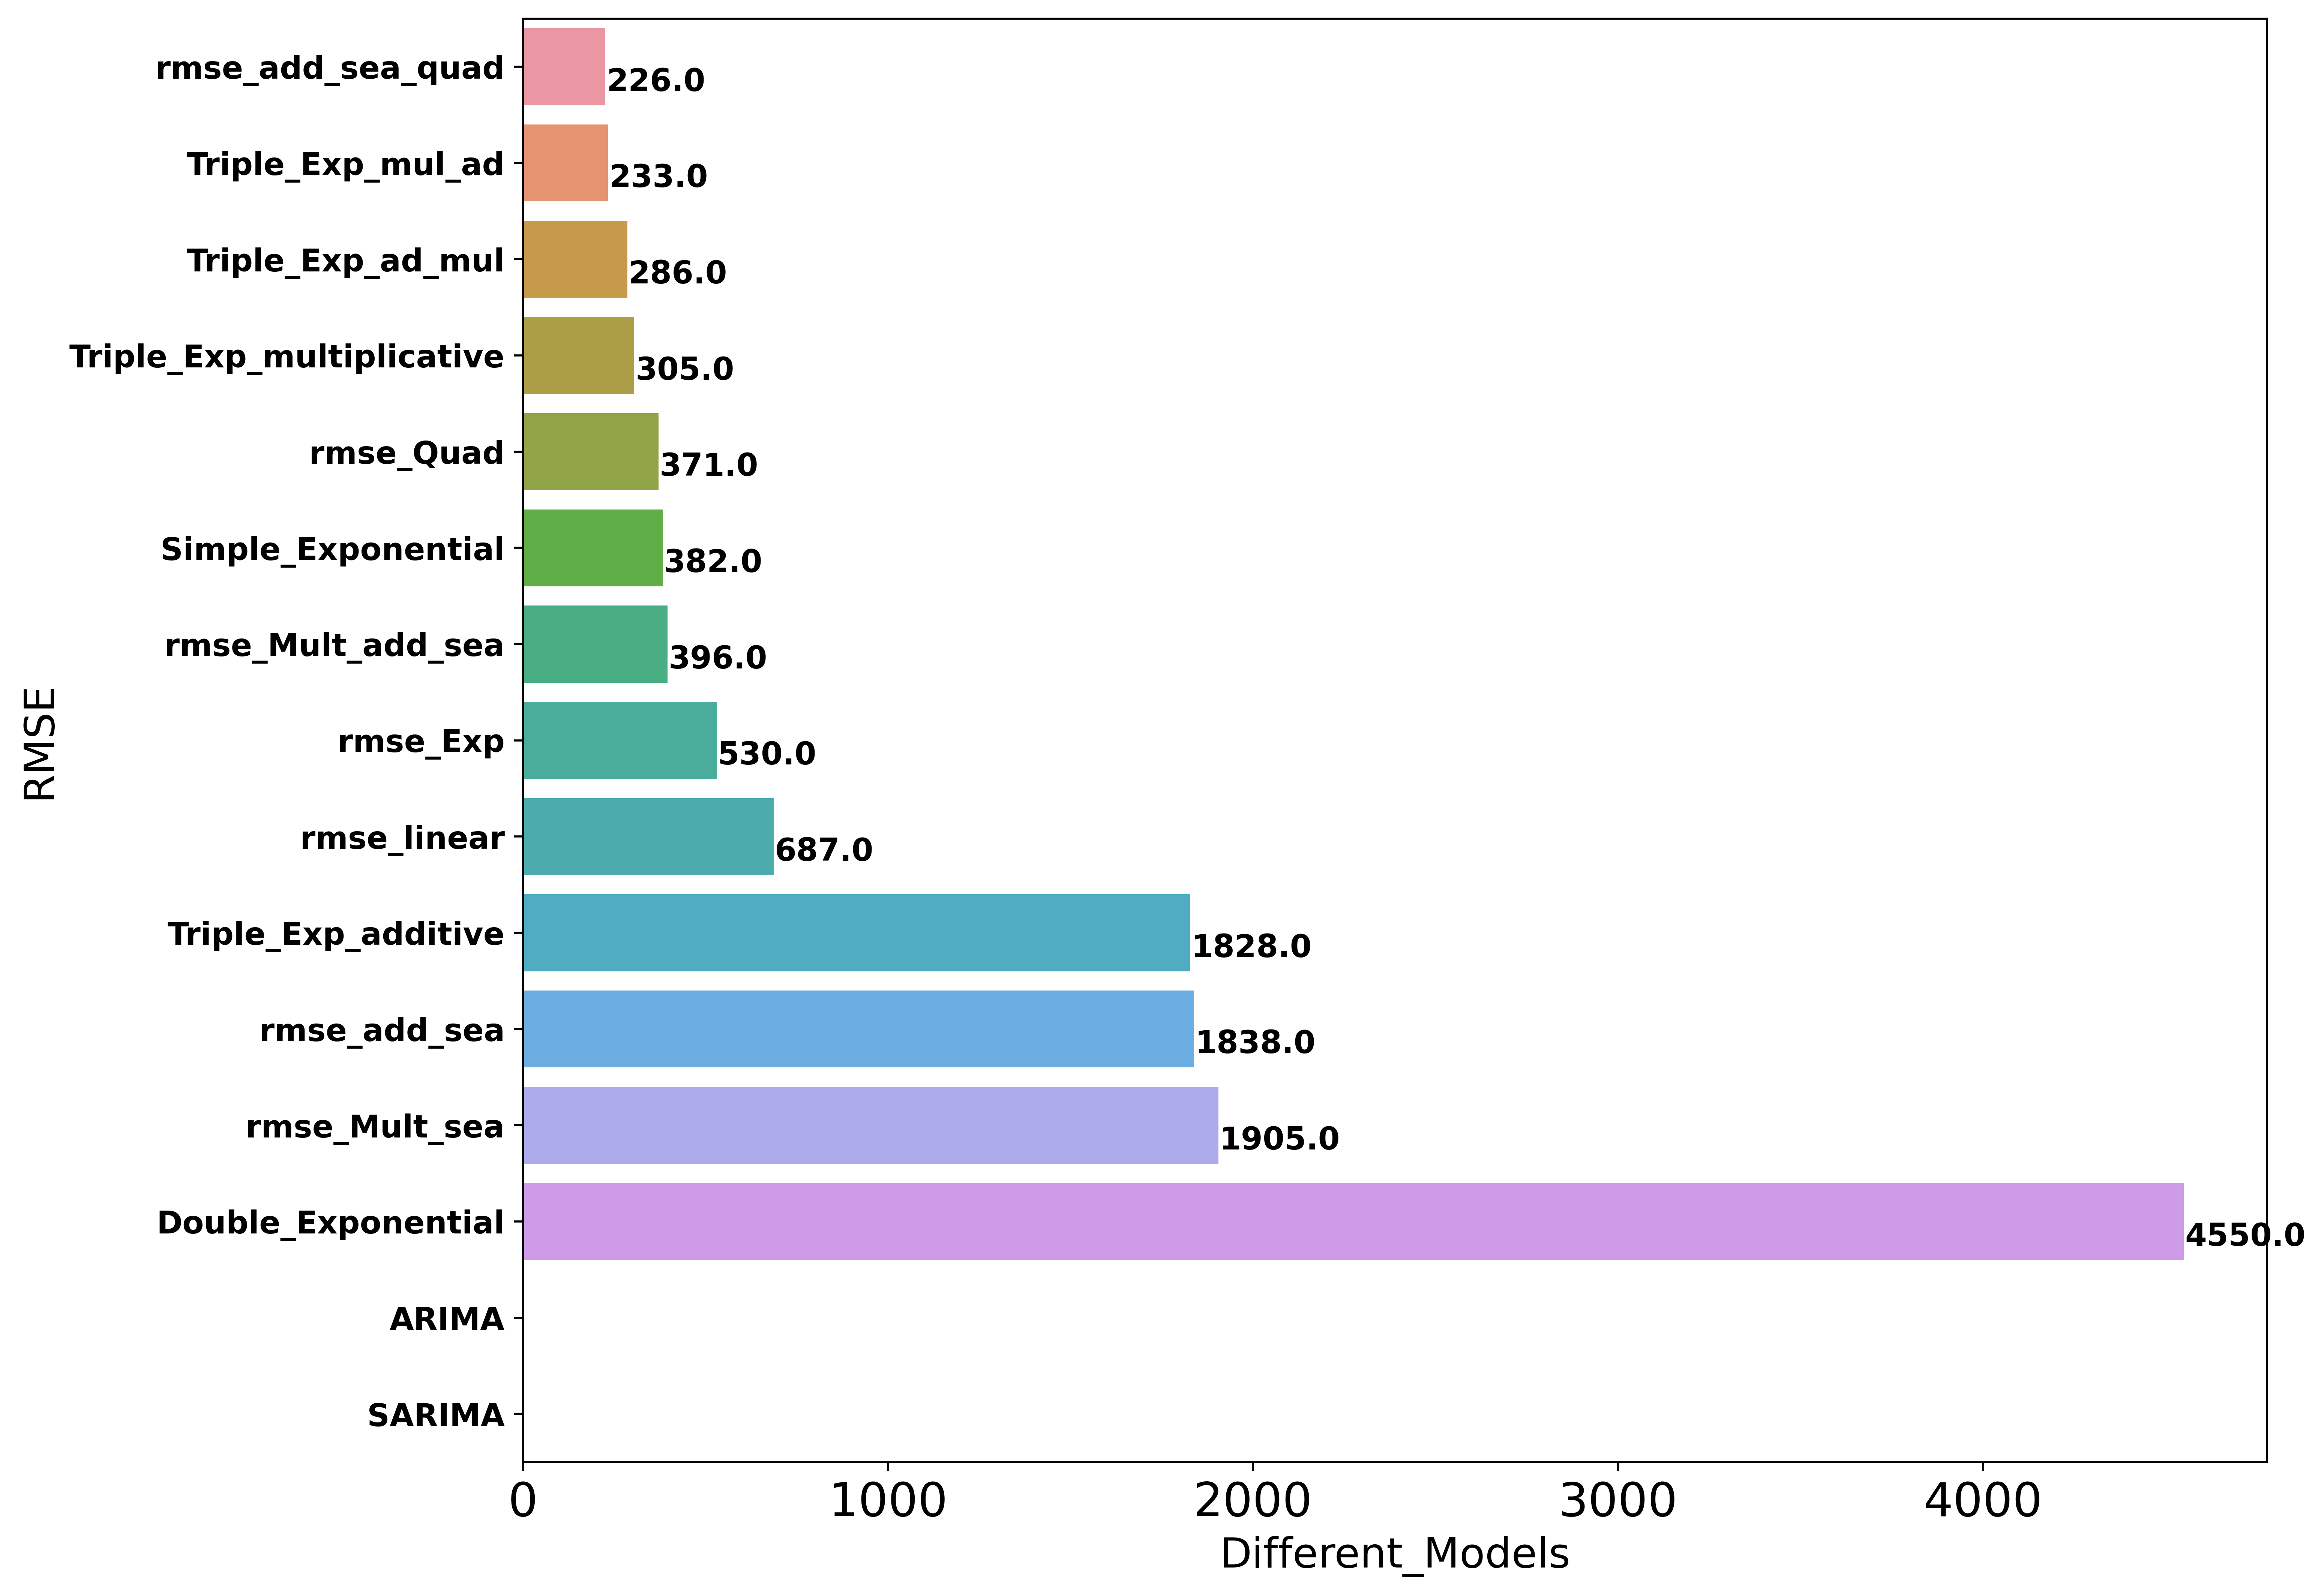

In [170]:
f, axe = plt.subplots(1,1, figsize=(12,10), dpi=500)
sns.barplot(x='RMSE_Values', y='Models', data=e, ax = axe)
axe.set_xlabel('Different_Models', size=16)
axe.set_ylabel('RMSE', size=16)
plt.yticks(fontsize=12,fontweight = 'bold')
plt.xticks(fontsize=18)

for i, v in enumerate(np.round(e.RMSE_Values.values,0)):
    axe.text(v + 3, i + .25, str(v),
            color = 'black', fontweight = 'bold', fontsize= 12)

plt.show()